# Introduction

## Project - Stock Market Analysis and Price Prediction

#### What exactly is the stock market?
The stock market is where investors connect to buy and sell investments — most commonly, stocks, which are shares of ownership in a public company

#### What is Stock Market Analysis?
Stock analysis is the evaluation of the Stock market as a whole i.e. How stocks of companies are performing. Stock analysts attempt to determine the future activity of an instrument, sector, or market

#### What is Stock Market Prediction?
Stock market prediction is the act of trying to determine the future value of a company stock. The successful prediction of a stock's future price could yield significant profit.


#### Our Goal
The Goal of our project is to analyse the Stocks Prices data of Big 5 Tech Companies - Apple, Microsoft, Google, Facebook and Amazon's data of past 20 years and predict future price of stocks. For collecting data we used API of financial website called 'https://www.alphavantage.co'. The data we got was in the form of JSON. We transformed the data in the form of dataframes. The data we finally got had  six columns - 'Date','Open'(price),'Close'(price),'High'(price),'Low'(price) and 'Volume Traded' on each day. First we set our index column as 'Date'. As our data was time Series most of the graphs we used for analysis of our data are 'Line Graphs'. We also used Candle plots which are actually used in high frequency trading markets. We individually analysed each comapny stock prices and then also compared them. 
Stock Prediction is basically an act of trying to determine the future value of a company stock. For Stock Market Prediction we trained our data on two Machine Learning Algorithms - Linear Regression and ARIMA. We achieved above 98% of accuracy in our prediction models.
#### Extra Mile
We also created a chatbot called 'StockBot' using google's dialogflow. We tried to integrate the StockBot with our project. The idea behind the StockBot was that in future if we want to predict the price of any stock, rather than running the whole model again we could just ask the StockBot and it will tell us the predictive price with same accuracy as of our model.

In [178]:
# Import libraries
import numpy as np
import requests
import json
import pandas as pd
from pprint import pprint 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
from sklearn import preprocessing

## Data Collection

### Apple Stock

In [179]:
# Used GET method to request data from API
r= requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&outputsize=full&apikey= L1WABIDLFLI1IJEJ')
# Convert the data into JSON
r_json  = r.json()
# Convert JSON data into Dataframe
df_apple = pd.DataFrame.from_dict(r_json['Time Series (Daily)'], orient='index')
# Convert datatype of index value to 'datetime'
df_apple.index=pd.to_datetime(df_apple.index)
# Set time as index column
df_apple.index.name='Date'
# Rename the columns names
df_apple.rename(columns={'1. open':'Open'},inplace=True)
df_apple.rename(columns={'2. high':'High'},inplace=True)
df_apple.rename(columns={'3. low':'Low'},inplace=True)
df_apple.rename(columns={'4. close':'Close'},inplace=True)
df_apple.rename(columns={'5. volume':'Volume Traded'},inplace=True)
# Convert the columns datatype from object to float 
cols = ['Open','High','Low','Close','Volume Traded']
for col in cols:
    df_apple[col] = df_apple[col].astype(float)
# Print the shape of dataset
print("Apple Dataset Size : "+str(df_apple.shape))
# Print the dataframe of Last 5 days 
df_apple.tail()

Apple Dataset Size : (5034, 5)


Open      High     Low   Close  Volume Traded
Date                                                       
2019-12-04  261.07  263.3100  260.68  261.74     16810388.0
2019-12-05  263.79  265.8900  262.73  265.58     18661343.0
2019-12-06  267.48  271.0000  267.30  270.71     26547493.0
2019-12-09  270.00  270.8000  264.91  266.92     31125769.0
2019-12-10  268.60  269.3839  265.86  269.32      4522678.0

#### Visulaization 1 - 
For an overview of Apple's Stock Trend and Performance over 20 years, we plot the graph. This plot is helpful for us to get the know the trend, seasonality and level of our time series graph.

Text(0.5, 0, 'Years')

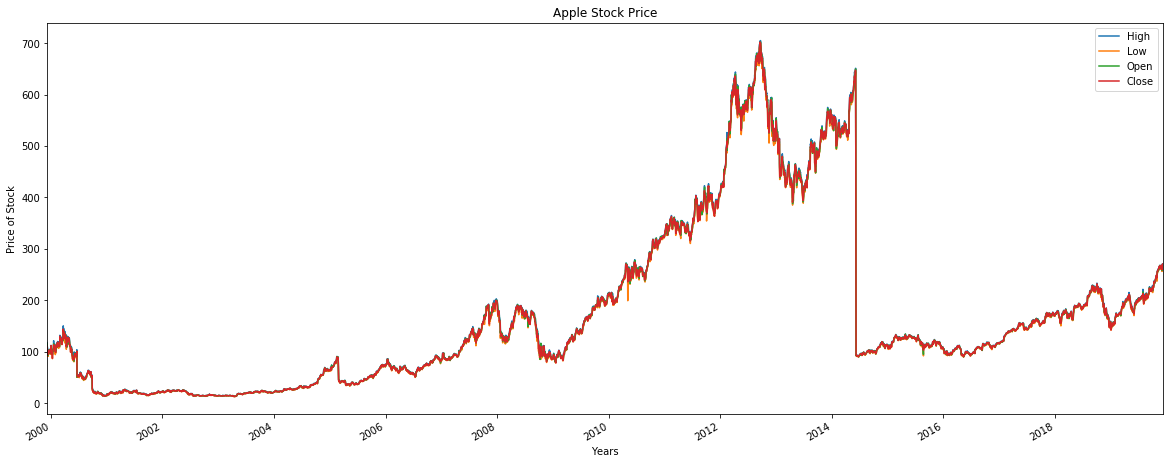

In [180]:
# Plot a graph between the columns of a dataframe
df_apple['High'].plot(figsize=(20,8));
df_apple['Low'].plot(figsize=(20,8));
df_apple['Open'].plot(figsize=(20,8));
df_apple['Close'].plot(figsize=(20,8));
# Add Legend to the graph
plt.legend(('High','Low','Open','Close'))
plt.title('Apple Stock Price')
plt.ylabel("Price of Stock")
plt.xlabel('Years')

Above, time series graph of Apple stock is a line graph of repeated measurements taken over regular time intervals. Time is always on the horizontal axis. On time series graphs Stock Prices of Open ,Close, High, Low are drawn at regular intervals and the points joined, usually with straight lines. Time series graphs help to show trends or patterns, seasonality and level.

### Similarly, for Microsoft,Google, Facebook, Amazon we collected the data from same source and plotted our first visualization.

### Microsoft Stock

In [181]:
# Used GET method to request data from API
r= requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey= L1WABIDLFLI1IJEJ')
# Convert the data into JSON
r_json  = r.json()
# Convert JSON data into Dataframe
df_microsoft = pd.DataFrame.from_dict(r_json['Time Series (Daily)'], orient='index')
# Convert datatype of index value to 'datetime'
df_microsoft.index=pd.to_datetime(df_microsoft.index)
# Set time as index column
df_microsoft.index.name='Date'
# Rename the columns names
df_microsoft.rename(columns={'1. open':'Open'},inplace=True)
df_microsoft.rename(columns={'2. high':'High'},inplace=True)
df_microsoft.rename(columns={'3. low':'Low'},inplace=True)
df_microsoft.rename(columns={'4. close':'Close'},inplace=True)
df_microsoft.rename(columns={'5. volume':'Volume Traded'},inplace=True)
# Convert the columns datatype from object to float 
cols = ['Open','High','Low','Close','Volume Traded']
for col in cols:
    df_microsoft[col] = df_microsoft[col].astype(float)
# Print the shape of dataset
print("Microsoft Dataset Size : "+str(df_microsoft.shape))
# Print the dataframe of Last 5 days 
df_microsoft.tail()

Microsoft Dataset Size : (5034, 5)


Open      High     Low   Close  Volume Traded
Date                                                       
2019-12-04  150.14  150.1799  149.20  149.85     17580617.0
2019-12-05  150.05  150.3200  149.48  149.93     17880601.0
2019-12-06  150.99  151.8700  150.27  151.75     16410400.0
2019-12-09  151.07  152.2100  150.91  151.36     15282906.0
2019-12-10  151.29  151.6200  150.89  151.53      2610339.0

#### Visulaization 1 -
For an overview of Microsoft's Stock Trend and Performance over 20 years, we plot the graph. This plot is helpful for us to get the know the trend, seasonality and level of our time series graph.

Text(0, 0.5, 'Stock Price')

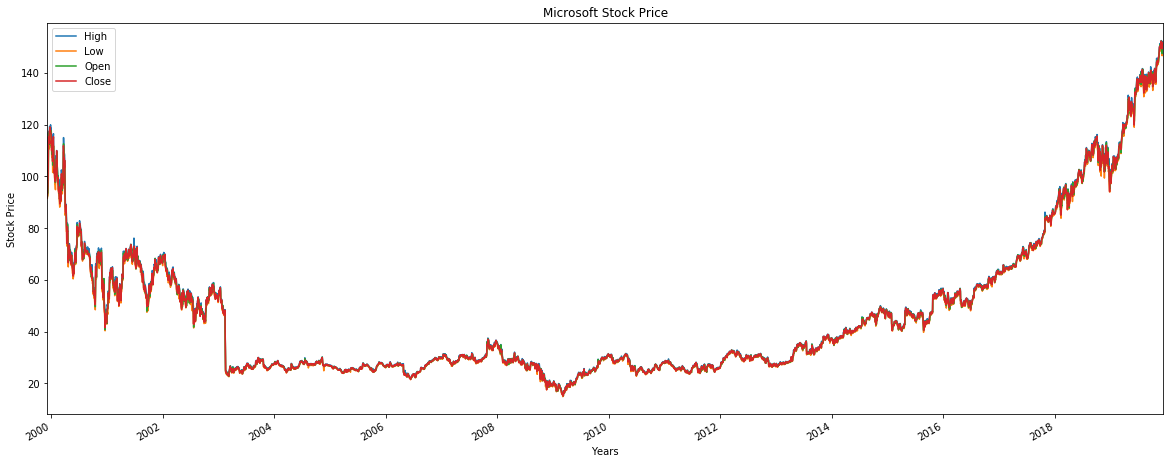

In [182]:
# Plot a graph between the columns of a dataframe
df_microsoft['High'].plot(figsize=(20,8));
df_microsoft['Low'].plot(figsize=(20,8));
df_microsoft['Open'].plot(figsize=(20,8));
df_microsoft['Close'].plot(figsize=(20,8));
# Add Legend to the graph
plt.legend(('High','Low','Open','Close'))
plt.title('Microsoft Stock Price')
plt.xlabel('Years')
plt.ylabel('Stock Price')


Above, time series graph of Microsoft stock is a line graph of repeated measurements taken over regular time intervals. Time is always on the horizontal axis. On time series graphs Stock Prices of Open ,Close, High, Low are drawn at regular intervals and the points joined, usually with straight lines. Time series graphs help to show trends or patterns, seasonality and level.

### Google Stock

In [183]:
# Used GET method to request data from API
r= requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GOOGL&outputsize=full&apikey= L1WABIDLFLI1IJEJ')
# Convert the data into JSON
r_json  = r.json()
# Conver JSON data into Dataframe
df_google = pd.DataFrame.from_dict(r_json['Time Series (Daily)'], orient='index')
# Convert datatype of index value to 'datetime'
df_google.index=pd.to_datetime(df_google.index)
# Set time as index column
df_google.index.name='Date'
# Rename the columns names
df_google.rename(columns={'1. open':'Open'},inplace=True)
df_google.rename(columns={'2. high':'High'},inplace=True)
df_google.rename(columns={'3. low':'Low'},inplace=True)
df_google.rename(columns={'4. close':'Close'},inplace=True)
df_google.rename(columns={'5. volume':'Volume Traded'},inplace=True)
# Convert the columns datatype from object to float 
cols = ['Open','High','Low','Close','Volume Traded']
for col in cols:
    df_google[col] = df_google[col].astype(float)
# Print the shape of dataset
print("Google Dataset Size : "+str(df_google.shape))
# Print the data of Last 5 days 
df_google.tail()

Google Dataset Size : (3855, 5)


Open     High      Low    Close  Volume Traded
Date                                                         
2019-12-04  1306.10  1324.27  1303.05  1318.94      1776392.0
2019-12-05  1327.00  1327.98  1314.32  1326.96      1220631.0
2019-12-06  1332.75  1342.47  1331.23  1339.39      1648729.0
2019-12-09  1338.86  1357.55  1336.07  1342.99      1417560.0
2019-12-10  1339.94  1345.58  1334.00  1345.56       140127.0

#### Visulaization 1 - 
For an overview of Google's Stock Trend and Performance since 2004, we plot the graph. This plot is helpful for us to get the know the trend, seasonality and level of our time series graph.

Text(0.5, 1.0, 'Google Stock Price')

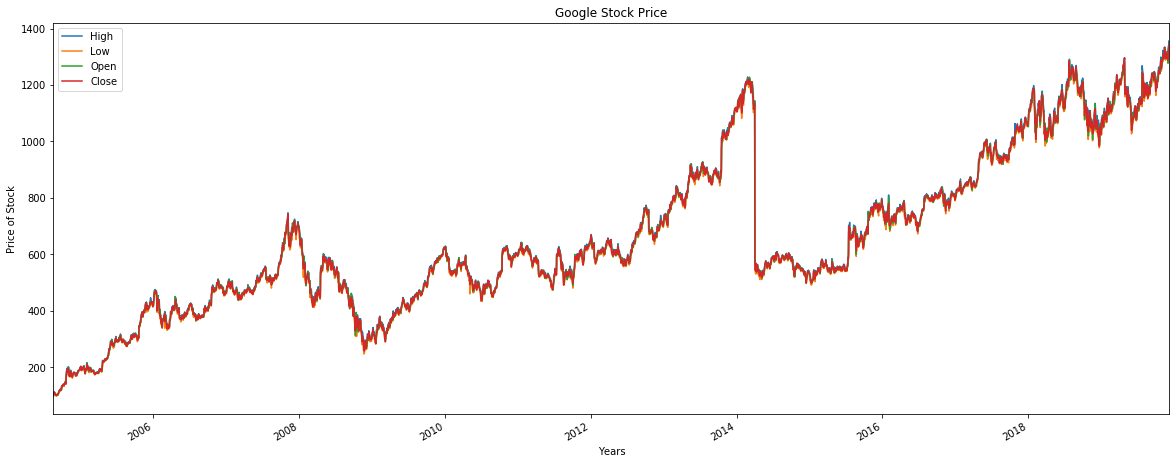

In [184]:
# Plot a graph between the columns of a dataframe
df_google['High'].plot(figsize=(20,8));
df_google['Low'].plot(figsize=(20,8));
df_google['Open'].plot(figsize=(20,8));
df_google['Close'].plot(figsize=(20,8));
# Add Legend to the graph
plt.legend(('High','Low','Open','Close'))
plt.ylabel("Price of Stock")
plt.xlabel('Years')
plt.title('Google Stock Price')

Above, time series graph of Google stock is a line graph of repeated measurements taken over regular time intervals. Time is always on the horizontal axis. On time series graphs Stock Prices of Open ,Close, High, Low are drawn at regular intervals and the points joined, usually with straight lines. Time series graphs help to show trends or patterns, seasonality and level.

### Facebook Stock

In [185]:
# Used GET method to request data from API
r= requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=FB&outputsize=full&apikey= L1WABIDLFLI1IJEJ')
# Convert the data into JSON
r_json  = r.json()
# Conver JSON data into Dataframe
df_fb = pd.DataFrame.from_dict(r_json['Time Series (Daily)'], orient='index')
# Convert datatype of index value to 'datetime'
df_fb.index=pd.to_datetime(df_fb.index)
# Set time as index column
df_fb.index.name='Date'
# Rename the columns names
df_fb.rename(columns={'1. open':'Open'},inplace=True)
df_fb.rename(columns={'2. high':'High'},inplace=True)
df_fb.rename(columns={'3. low':'Low'},inplace=True)
df_fb.rename(columns={'4. close':'Close'},inplace=True)
df_fb.rename(columns={'5. volume':'Volume Traded'},inplace=True)
# Convert the columns datatype from object to float 
cols = ['Open','High','Low','Close','Volume Traded']
for col in cols:
    df_fb[col] = df_fb[col].astype(float)
# Print the shape of dataset
print("Facebook Dataset Size : "+str(df_fb.shape))
# Print the data of Last 5 days 
df_fb.tail()

Facebook Dataset Size : (1903, 5)


Open      High       Low   Close  Volume Traded
Date                                                         
2019-12-04  200.00  200.0288  198.0500  198.71      8459939.0
2019-12-05  199.86  201.2900  198.2126  199.36      9755350.0
2019-12-06  200.50  201.5700  200.0600  201.05     12279525.0
2019-12-09  200.65  203.1418  200.2100  201.34     11689824.0
2019-12-10  201.66  202.0500  200.1900  200.54      1778553.0

#### Visulaization 1 - 
For an overview of Facebook's Stock Trend and Performance since 2012, we plot the graph. This plot is helpful for us to get the know the trend, seasonality and level of our time series graph.

Text(0.5, 1.0, 'Facebook Stock Price')

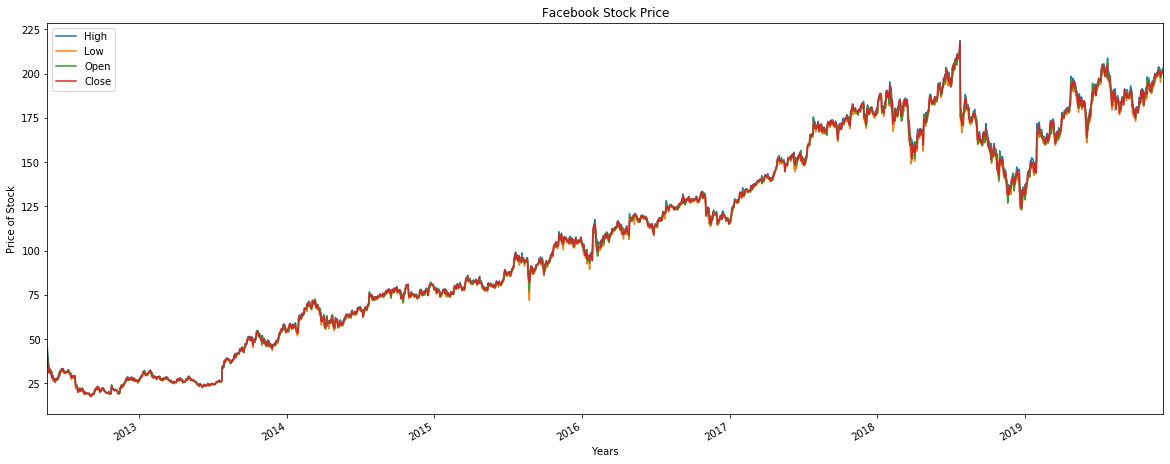

In [186]:
# Plot a graph between the columns of a dataframe
df_fb['High'].plot(figsize=(20,8));
df_fb['Low'].plot(figsize=(20,8));
df_fb['Open'].plot(figsize=(20,8));
df_fb['Close'].plot(figsize=(20,8));
# Add Legend to the graph
plt.legend(('High','Low','Open','Close'))
plt.ylabel("Price of Stock")
plt.xlabel('Years')
plt.title('Facebook Stock Price')

Above, time series graph of Facebook stock is a line graph of repeated measurements taken over regular time intervals. Time is always on the horizontal axis. On time series graphs Stock Prices of Open ,Close, High, Low are drawn at regular intervals and the points joined, usually with straight lines. Time series graphs help to show trends or patterns, seasonality and level.

### Amazon Stock

In [187]:
# Used GET method to request data from API
r= requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMZN&outputsize=full&apikey= L1WABIDLFLI1IJEJ')
# Convert the data into JSON
r_json  = r.json()
# Conver JSON data into Dataframe
df_amazon = pd.DataFrame.from_dict(r_json['Time Series (Daily)'], orient='index')
# Convert datatype of index value to 'datetime'
df_amazon.index=pd.to_datetime(df_amazon.index)
# Set time as index column
df_amazon.index.name='Date'
# Rename the columns names
df_amazon.rename(columns={'1. open':'Open'},inplace=True)
df_amazon.rename(columns={'2. high':'High'},inplace=True)
df_amazon.rename(columns={'3. low':'Low'},inplace=True)
df_amazon.rename(columns={'4. close':'Close'},inplace=True)
df_amazon.rename(columns={'5. volume':'Volume Traded'},inplace=True)
# Convert the columns datatype from object to float 
cols = ['Open','High','Low','Close','Volume Traded']
for col in cols:
    df_amazon[col] = df_amazon[col].astype(float)
# Print the shape of dataset
print("Amazon Dataset Size : "+str(df_amazon.shape))
# Print the data of Last 5 days 
df_amazon.tail()

Amazon Dataset Size : (5034, 5)


Open     High        Low     Close  Volume Traded
Date                                                            
2019-12-04  1774.01  1789.09  1760.2200  1760.690      2680700.0
2019-12-05  1763.50  1763.50  1740.0000  1740.480      2827852.0
2019-12-06  1751.20  1754.40  1740.1300  1751.600      3119979.0
2019-12-09  1750.66  1766.89  1745.6100  1749.510      2367511.0
2019-12-10  1747.40  1750.63  1740.5522  1748.895       390510.0

#### Visulaization 1 - 
For an overview of Amazon's Stock Trend and Performance over 20 years, we plot the graph. This plot is helpful for us to get the know the trend, seasonality and level of our time series graph.

Text(0.5, 1.0, 'Amazon Stock Price')

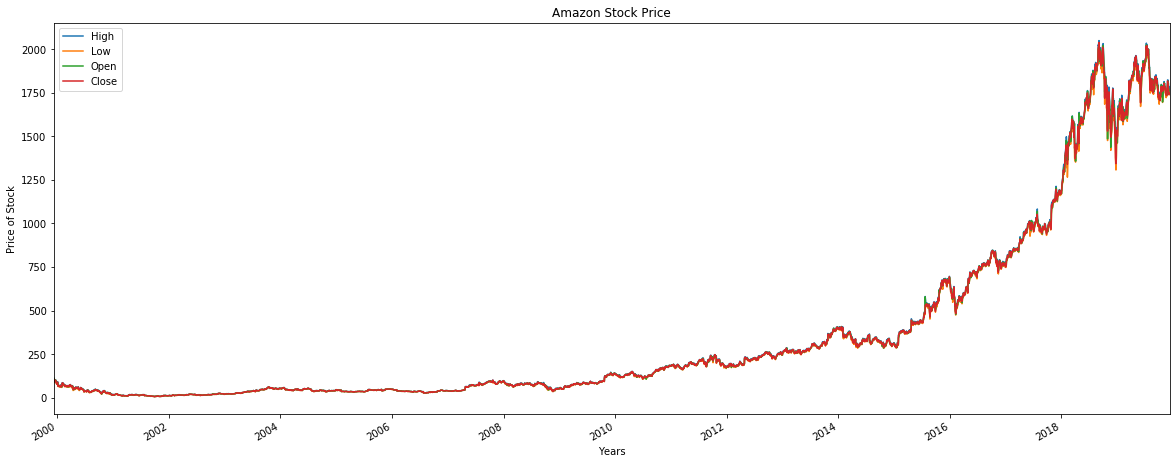

In [188]:
# Plot a graph between the columns of a dataframe
df_amazon['High'].plot(figsize=(20,8));
df_amazon['Low'].plot(figsize=(20,8));
df_amazon['Open'].plot(figsize=(20,8));
df_amazon['Close'].plot(figsize=(20,8));
# Add Legend to the graph
plt.legend(('High','Low','Open','Close'))
plt.ylabel("Price of Stock")
plt.xlabel('Years')
plt.title('Amazon Stock Price')

Above, time series graph of Amazon stock is a line graph of repeated measurements taken over regular time intervals. Time is always on the horizontal axis. On time series graphs Stock Prices of Open ,Close, High, Low are drawn at regular intervals and the points joined, usually with straight lines. Time series graphs help to show trends or patterns, seasonality and level.

# Candlestick Plot or Candle Plot

A Candlestick Plot (also called Japanese candlestick chart) is a style of financial chart used to describe price movements of Stock. Each "candlestick" typically shows one day.

It is similar to a bar chart in that each candlestick represents all four important pieces of information for that day: open, close, high, and low. Being densely packed with information, it tends to represent trading patterns over short periods of time.

Candle stick plots are used in high algorithmic frequency trading(trade orders exchange with the market at high speeds) for technical analysis of stock market (reading the charts and using statistical figures to identify the trends in the stock market)

Candlestick chart are similar to box plots. Both show maximum and minimum values. The difference between them is in the information conveyed by the box in between the max and min values.

Bullish Candle (GREEN): When the close is higher than the open  
Bearish Candle (RED): When the close is lower than the open

### Apple

In [189]:
data_apple=df_apple.reset_index(inplace = False) 
fig = go.Figure(data=[go.Candlestick(x=data_apple['Date'],
#                 xaxis_title="Stock Price",
#                 yaxis_title="Years",
                open=data_apple['Open'],
                high=data_apple['High'],
                low=data_apple['Low'],
                close=data_apple['Close'])])
fig.update_layout(
    title="Apple Stocks",
    xaxis_title="Years",
    yaxis_title="Price of Stocks",
)

fig.show()

#### Visualization 2 -
The candle plot above shows the trend of Apple's stock from 1999 to 2000. the red candles above are bearish candles which means the stock closed at lower value than open value. The green candles are bullish cnadles which means the stock closed at higher value than the open price. When we hover over the graph, each candle will show us all these for values for every day. 

For the graph above we observed some drastic change for some duration in the trend of graph. For the specific area of interest we can ZOOM-IN to Explore

In [190]:
data_apple=df_apple.reset_index(inplace = False)
mask = (data_apple['Date'] > '2014-04-01') & (data_apple['Date'] <= '2015-05-31')
data_apple = data_apple.loc[mask]
 
fig = go.Figure(data=[go.Candlestick(x=data_apple['Date'],
                open=data_apple['Open'],
                high=data_apple['High'],
                low=data_apple['Low'],
                close=data_apple['Close'])])
fig.update_layout(
    title="Apple Stocks",
    xaxis_title="Years",
    yaxis_title="Price of Stocks",
)

fig.show()

From above we can see that Apple stocks price dropped in 2014. The reason was that - Apple did what's known as a stock split. It issued more shares to existing investors in order to bring down the price of the stock. Current shareholders received seven shares of Apple for each one they owned. 

### Similary for Microsoft, Google, Facebook and Amazon, we plotted Candle plot. We drew infrence from each plot by zooming in at plots.

### Miscrosoft

In [191]:
data_microsoft=df_microsoft.reset_index(inplace = False) 
fig = go.Figure(data=[go.Candlestick(x=data_microsoft['Date'],
                open=data_microsoft['Open'],
                high=data_microsoft['High'],
                low=data_microsoft['Low'],
                close=data_microsoft['Close'])])
fig.update_layout(
    title="Microsoft Stocks",
    xaxis_title="Years",
    yaxis_title="Price of Stocks",
)

fig.show()

#### Visualization 2 -
The candle plot above shows the trend of Microsoft's stock from 1999 to 2000. the red candles above are bearish candles which means the stock closed at lower value than open value. The green candles are bullish candles which means the stock closed at higher value than the open price. When we hover over the graph, each candle will show us all these values for each day.

For the graph above we observed some drastic change for some duration in the trend of graph. For the specific area of interest we can ZOOM-IN to Explore

In [192]:
data_microsoft=df_microsoft.reset_index(inplace = False)
mask = (data_microsoft['Date'] > '2003-01-01') & (data_microsoft['Date'] <= '2003-12-31')
data_microsoft = data_microsoft.loc[mask]
 
fig = go.Figure(data=[go.Candlestick(x=data_microsoft['Date'],
                open=data_microsoft['Open'],
                high=data_microsoft['High'],
                low=data_microsoft['Low'],
                close=data_microsoft['Close'])])
fig.update_layout(
    title="Microsoft Stocks",
    xaxis_title="Years",
    yaxis_title="Price of Stocks",
)

fig.show()

From above we can observe that Microsoft's share price dropped in 2003. The reason behind this was stock split. As th result of the stock split, shareholders received one additional common share for every share held on the record date of Jan. 27, 2003. this resulted in the price drop.

### Google

In [193]:
data_google=df_google.reset_index(inplace = False) 
fig = go.Figure(data=[go.Candlestick(x=data_google['Date'],
                open=data_google['Open'],
                high=data_google['High'],
                low=data_google['Low'],
                close=data_google['Close'])])
fig.update_layout(
    title="Google Stocks",
    xaxis_title="Years",
    yaxis_title="Price of Stocks",
)

fig.show()

#### Visualization 2 -
The candle plot above shows the trend of Microsoft's stock from 1999 to 2000. the red candles above are bearish candles which means the stock closed at lower value than open value. The green candles are bullish candles which means the stock closed at higher value than the open price. When we hover over the graph, each candle will show us all these for values for every day.

For the graph above we observed some drastic change for some duration in the trend of graph. For the specific area of interest we can ZOOM-IN to Explore

In [194]:
data_google=df_google.reset_index(inplace = False)
mask = (data_google['Date'] > '2014-01-01') & (data_google['Date'] <= '2014-12-31')
data_google = data_google.loc[mask]
 
fig = go.Figure(data=[go.Candlestick(x=data_google['Date'],
                open=data_google['Open'],
                high=data_google['High'],
                low=data_google['Low'],
                close=data_google['Close'])])
fig.update_layout(
    title="Google Stocks",
    xaxis_title="Years",
    yaxis_title="Price of Stocks",
)


fig.show()

Similar to reasons of Microsoft and Apple, Google's price also dropped because of stock split

### Facebook

In [195]:
data_fb=df_fb.reset_index(inplace = False) 
fig = go.Figure(data=[go.Candlestick(x=data_fb['Date'],
                open=data_fb['Open'],
                high=data_fb['High'],
                low=data_fb['Low'],
                close=data_fb['Close'])])
fig.update_layout(
    title="Facebook Stocks",
    xaxis_title="Years",
    yaxis_title="Price of Stocks",
)


fig.show()

#### Visualization 2 -
The candle plot above shows the trend of Facebook's stock from 1999 to 2000. the red candles above are bearish candles which means the stock closed at lower value than open value. The green candles are bullish candles which means the stock closed at higher value than the open price. When we hover over the graph, each candle will show us all these for values for every day.

For the graph above we observed some drastic change for some duration in the trend of graph. For the specific area of interest we can ZOOM-IN to Explore

In [196]:
data_fb=df_fb.reset_index(inplace = False)
mask = (data_fb['Date'] > '2018-04-01') & (data_fb['Date'] <= '2018-12-31')
data_fb = data_fb.loc[mask]
 
fig = go.Figure(data=[go.Candlestick(x=data_fb['Date'],
                open=data_fb['Open'],
                high=data_fb['High'],
                low=data_fb['Low'],
                close=data_fb['Close'])])
fig.update_layout(
    title="Facebook Stocks",
    xaxis_title="Years",
    yaxis_title="Price of Stocks",
)

fig.show()

On 26th July, 2018, the market capitalization of the social media giant Facebook fell by $119 billion. This is the biggest single-day market Cap drop in US Stocks.
Many investors state that Faebook's higher spendings focusing on the security policies and the growing unpopularity of its applications as the reason for this drop.

## Amazon

In [197]:
data_amazon=df_amazon.reset_index(inplace = False) 
fig = go.Figure(data=[go.Candlestick(x=data_amazon['Date'],
                open=data_amazon['Open'],
                high=data_amazon['High'],
                low=data_amazon['Low'],
                close=data_amazon['Close'])])
fig.update_layout(
    title="Amazon Stocks",
    xaxis_title="Years",
    yaxis_title="Price of Stocks",
)

fig.show()

#### Visualization 2 -
The candle plot above shows the trend of Amazon's stock from 1999 to 2000. the red candles above are bearish candles which means the stock closed at lower value than open value. The green candles are bullish candles which means the stock closed at higher value than the open price. When we hover over the graph, each candle will show us all these for values for every day.

For the graph above we observed some drastic change for some duration in the trend of graph. For the specific area of interest we can ZOOM-IN to Explore

In [198]:
data_amazon=df_amazon.reset_index(inplace = False)
mask = (data_amazon['Date'] > '2017-04-01') & (data_amazon['Date'] <= '2019-12-31')
data_amazon = data_amazon.loc[mask]
 
fig = go.Figure(data=[go.Candlestick(x=data_amazon['Date'],
                open=data_amazon['Open'],
                high=data_amazon['High'],
                low=data_amazon['Low'],
                close=data_amazon['Close'])])
fig.update_layout(
    title="Amazon Stocks",
    xaxis_title="Years",
    yaxis_title="Price of Stocks",
)

fig.show()

1.In 2018, the Amazon's stock value shows a lot of fluctuations. The rises moslty are seen in the last quarter of 2018, credits to the AWS devepoment venture and acquisition of the Whole Foods, an American multinational supermarket chain.

2.The drops occured due to the NASDAQ falling 12.7%, which not only affected the stock price of Amazon, but many other technology companies.

#### Key Takeaways:

The market capitalization drop that many big companies face can be generlised due to the following possible reasons:

1.When major shareholders sell their stocks

2.There is a spread of negative information which triggers the stock collapse

3.The future prospects of the company may not appeal to the customers, which causes a lack in demand for the company's product/services.

# Comparison

How do you tell if a stock is doing well, in comparison to other stocks?

For this we need to compare Stocksp prices

Since different stocks have different price values, the comparison is done on relative basis, where all the prices are normalized to 100$ at the first day of the time interval we are interested in.

To achieve this, first we created a dataframe out of all dataframes available with the values of interest over a selected time interval, then divided each column with its first value, and then multiplied it by 100.

### At Opening Price


In [199]:
# Created a dataframe of all the companies with their open stock prices 
df_open=pd.concat([df_apple['Open'],df_microsoft['Open'],df_google['Open'],df_fb['Open'],df_amazon['Open']],axis=1)
df_open.columns=['Apple','Microsoft','Google','Facebook','Amazon']
df_open.dropna(inplace=True)
df_open.head()

Apple  Microsoft  Google  Facebook  Amazon
Date                                                   
2012-05-18  533.96      29.79  625.10     42.05  219.41
2012-05-21  534.50      29.10  600.51     36.53  214.03
2012-05-22  569.55      29.69  613.44     32.61  218.31
2012-05-23  557.50      29.35  601.65     31.37  214.71
2012-05-24  575.87      29.16  609.16     32.95  216.98

In [200]:
df_open.iloc[0]

Apple        533.96
Microsoft     29.79
Google       625.10
Facebook      42.05
Amazon       219.41
Name: 2012-05-18 00:00:00, dtype: float64

In [201]:
# Normalized the open stock price of each company
normalized=df_open.div(df_open.iloc[0]).mul(100)
normalized.head()

Apple   Microsoft      Google    Facebook      Amazon
Date                                                                  
2012-05-18  100.000000  100.000000  100.000000  100.000000  100.000000
2012-05-21  100.101131   97.683787   96.066229   86.872771   97.547970
2012-05-22  106.665293   99.664317   98.134698   77.550535   99.498655
2012-05-23  104.408570   98.522994   96.248600   74.601665   97.857892
2012-05-24  107.848903   97.885196   97.450008   78.359096   98.892484

Text(0.5, 1.0, 'Stock Open Price Comparison')

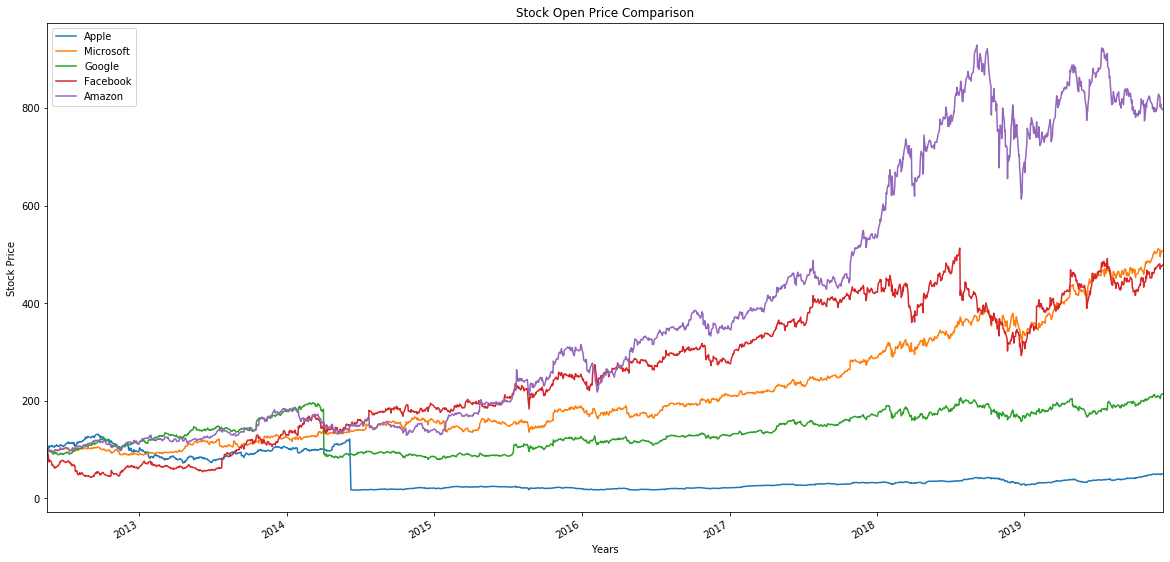

In [202]:
# Plotted the graph with normalized dataframe
normalized.plot(figsize=(20,10))
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.title('Stock Open Price Comparison')

#### Visualization 3- 
So, from the graph above we can see that, all the firm's Open stock prices are normalized to $100. From that time Amazon had the best growth compared to other firms, while Apple has the worst growth till now, comparatively. 
We can also see that microsoft and facebook are involved in neck to neck competition since 2012 till 2019

### At Closing Prices

In [203]:
# Created a new dataframe of all the companies with their closing stock prices 
df_close=pd.concat([df_apple['Close'],df_microsoft['Close'],df_google['Close'],df_fb['Close'],df_amazon['Close']],axis=1)
df_close.columns=['Apple','Microsoft','Google','Facebook','Amazon']
df_close.dropna(inplace=True)
df_close.head()

Apple  Microsoft  Google  Facebook  Amazon
Date                                                   
2012-05-18  530.38      29.27  600.40   38.2318  213.85
2012-05-21  561.28      29.75  614.11   34.0300  218.11
2012-05-22  556.97      29.76  600.80   31.0000  215.33
2012-05-23  570.56      29.11  609.46   32.0000  217.28
2012-05-24  565.32      29.07  603.66   33.0300  215.24

In [204]:
# Normalized the close stock price of each company
normalized=df_close.div(df_close.iloc[0]).mul(100)
normalized.head()

Apple   Microsoft      Google    Facebook      Amazon
Date                                                                  
2012-05-18  100.000000  100.000000  100.000000  100.000000  100.000000
2012-05-21  105.826012  101.639904  102.283478   89.009673  101.992051
2012-05-22  105.013387  101.674069  100.066622   81.084333  100.692074
2012-05-23  107.575700   99.453365  101.508994   83.699957  101.603928
2012-05-24  106.587730   99.316707  100.542971   86.394049  100.649988

Text(0.5, 1.0, 'Stock Close Price Comparison')

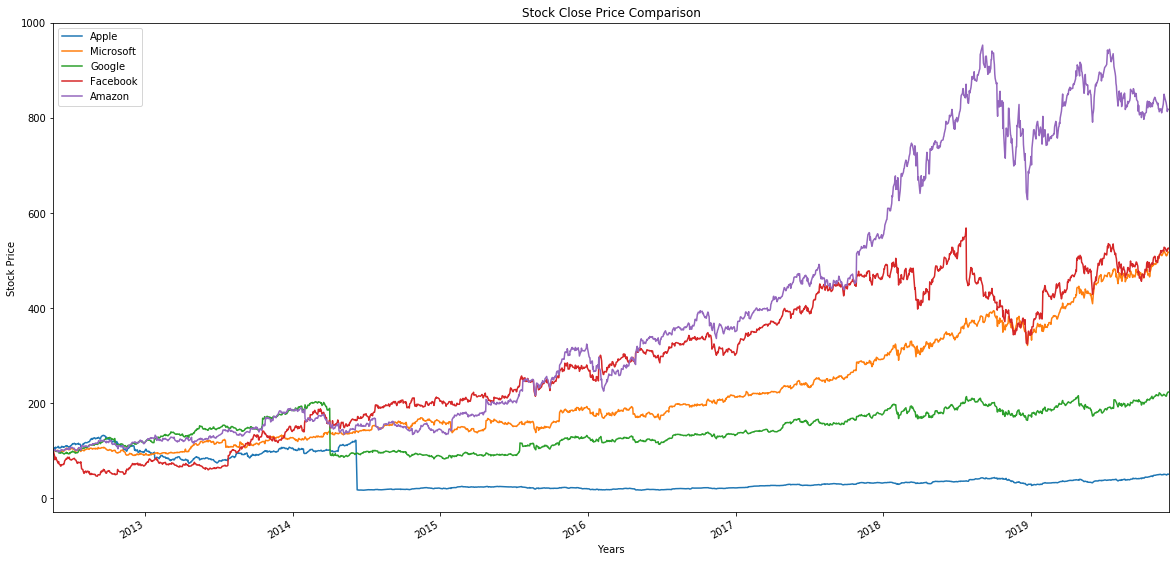

In [205]:
# Plotted the graph with normalized dataframe
normalized.plot(figsize=(20,10))
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.title('Stock Close Price Comparison')

#### Visualization 3 -
Similar to the above, all the firm's Close stock prices are normalized to $100. From that time Amazon had the best growth compared to other firms, while Apple has the worst growth till now, comparatively. 
We can also see that microsoft and facebook are involved in neck to neck competition since 2012 till 2019

In [206]:
# Ignore Warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Stocks Prediction

So far we have analysed the behaviour and performance of stocks of Big 5 Tech Companies. Now its time to Predict the Future Stocks Prices using Machine Learning Algorithms.

Machine Learning Prediction refers to the output of an algorithm after it has been trained on a historical dataset and applied to new data when forecasting the likelihood of a particular outcome

Fot the Stock Price prediction, we will use two Machine Learning Algorithms - Linear Regression and ARIMA.

### Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task.

The term linear implies that the model is specified as a linear combination of features. Based on training data, the learning process computes one weight for each feature to form a model that can predict or estimate the target value.

Here we applied linear Regression on all 5 Tech Companies to predict their closing stock price. In this task we achieved abbove 99% accuracy

### Apple

Text(0.5, 1, 'Correlation b/w Apple Data Columns')

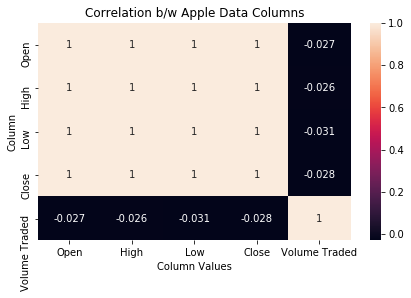

In [207]:
# Plot heatmap between the columns of dataframe
import seaborn as sns
plt.figure(1 , figsize = (7 ,4))
cor = sns.heatmap(df_apple.corr(),xticklabels=True, yticklabels=True, annot = True)
plt.xlabel("Column Values")
plt.ylabel("Column")
plt.title('Correlation b/w Apple Data Columns')


#### Visualization 4 -
A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader. 
The plot above is correlation heatmap. It is telling how much the values of columns of the dataframe are correlated to each other. As the values are mostly 1, it tells that columns are highly correlated to each other. We can drop the highly correlated columns and can do prediction on single column as they are highly correlated, but we are keeping all the columns for linear regression.

In [208]:
# Rearranging the order of columns for analysis
df_apple=df_apple[["Close",'Open','High','Low','Volume Traded']]
df_apple.head(2)

Close    Open    High     Low  Volume Traded
Date                                                     
1999-12-08  110.06  116.25  117.87  109.50      3681700.0
1999-12-09  105.25  111.00  111.00  100.87      7635700.0

In [209]:
# select our features for regression
x = df_apple.loc[:,'Open':'Volume Traded']
y = df_apple.loc[:,'Close']

In [210]:
# divide the data in 70;30 ratio for train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [211]:
# Applied linear regression on train data
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [212]:
# tested the accuracy of linear regression on test data
LR.score(x_test,y_test)

0.9999276345295603

#### Result -  From above we can see that our Linear regression score is 0.9999, which means that the model we trained on our train data has achieved an accuracy of 99.99 % when applied on the test data.

In [213]:
# Cross check the data on a random day
Test_data = [[112.19,115.56,111.87,5785000.0]]
prediction = LR.predict(Test_data)
print(prediction)

[114.78929282]


## Microsoft

Text(0.5, 1, 'Correlation b/w Microsoft Data Columns')

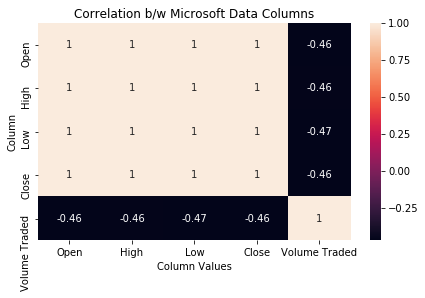

In [214]:
# Plot heatmap between the columns of dataframe
plt.figure(1 , figsize = (7,4))
cor = sns.heatmap(df_microsoft.corr(), annot = True)
plt.xlabel("Column Values")
plt.ylabel("Column")
plt.title('Correlation b/w Microsoft Data Columns')

#### Visualization 4 -
A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader. 
The plot above is correlation heatmap. It is telling how much the values of columns of the dataframe are correlated to each other. As the values are mostly 1, it tells that columns are highly correlated to each other. We can drop the highly correlated columns and can do prediction on single column as they are highly correlated, but we are keeping all the columns for linear regression.

In [215]:
# Rearranging the order of columns for analysis
df_microsoft=df_microsoft[["Close",'Open','High','Low','Volume Traded']]
df_microsoft.head(2)

Close   Open   High    Low  Volume Traded
Date                                                 
1999-12-08  91.75  93.12  94.31  91.69     20477900.0
1999-12-09  92.75  92.00  93.31  91.44     23129100.0

In [216]:
#Let's select our features
x = df_microsoft.loc[:,'Open':'Volume Traded']
y = df_microsoft.loc[:,'Close']

In [217]:
# divide the data in 70;30 ratio for train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [218]:
# Applied linear regression on train data
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
# tested the accuracy of linear regression on test data
LR.score(x_test,y_test)

0.9998474298806759

#### Result -  From above we can see that our Linear regression score is 0.9998, which means that the model we trained on our train data has achieved an accuracy of 99.98 % when applied on the test data.

In [220]:
# Cross check the data on a random day
Test_data = [[95.81,97.12,95.73,32050300.0]]
prediction = LR.predict(Test_data)
print(prediction)

[96.83962376]


## Google

Text(0.5, 1, 'Correlation b/w Google Data Columns')

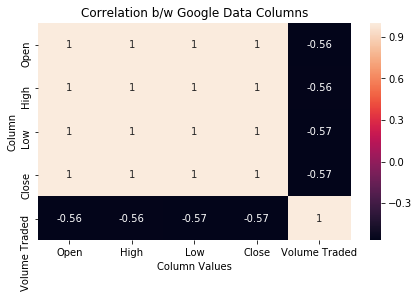

In [221]:
# Plot heatmap between the columns of dataframe
plt.figure(1 , figsize = (7 ,4))
cor = sns.heatmap(df_google.corr(), annot = True)
plt.xlabel("Column Values")
plt.ylabel("Column")
plt.title('Correlation b/w Google Data Columns')

#### Visualization 4 -
A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader. 
The plot above is correlation heatmap. It is telling how much the values of columns of the dataframe are correlated to each other. As the values are mostly 1, it tells that columns are highly correlated to each other. We can drop the highly correlated columns and can do prediction on single column as they are highly correlated, but we are keeping all the columns for linear regression.

In [222]:
# Rearranging the order of columns for analysis
df_google=df_google[["Close",'Open','High','Low','Volume Traded']]
df_google.head(2)

Close    Open    High     Low  Volume Traded
Date                                                      
2004-08-19  100.335  100.01  104.06   95.96     44659000.0
2004-08-20  108.310  101.01  109.08  100.50     22834300.0

In [223]:
#Let's select our features
x = df_google.loc[:,'Open':'Volume Traded']
y = df_google.loc[:,'Close']

In [224]:
# divide the data in 70;30 ratio for train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [225]:
# Applied linear regression on train data
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [226]:
# tested the accuracy of linear regression on test data
LR.score(x_test,y_test)

0.9998141170166897

#### Result -  From above we can see that our Linear regression score is 0.9998, which means that the model we trained on our train data has achieved an accuracy of 99.98 % when applied on the test data.

In [227]:
# Cross check the data on a random day
Test_data = [[101.01,109.08,100.50,22834300.0]]
prediction = LR.predict(Test_data)
print(prediction)

[107.18538745]


## Facebook

Text(0.5, 1, 'Correlation b/w Facebook Data Columns')

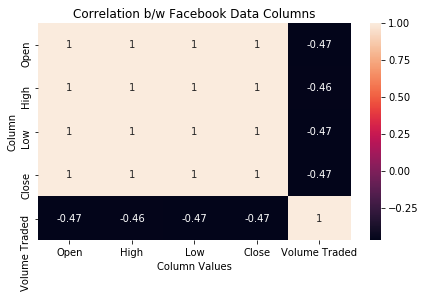

In [228]:
# Plot heatmap between the columns of dataframe
plt.figure(1 , figsize = (7 ,4))
cor = sns.heatmap(df_fb.corr(), annot = True)
plt.xlabel("Column Values")
plt.ylabel("Column")
plt.title('Correlation b/w Facebook Data Columns')

#### Visualization 4 -
A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader. 
The plot above is correlation heatmap. It is telling how much the values of columns of the dataframe are correlated to each other. As the values are mostly 1, it tells that columns are highly correlated to each other. We can drop the highly correlated columns and can do prediction on single column as they are highly correlated, but we are keeping all the columns for linear regression.

In [229]:
# Rearranging the order of columns for analysis
df_fb=df_fb[["Close",'Open','High','Low','Volume Traded']]
df_fb.head(2)

Close   Open   High   Low  Volume Traded
Date                                                  
2012-05-18  38.2318  42.05  45.00  38.0    573576400.0
2012-05-21  34.0300  36.53  36.66  33.0    168192700.0

In [230]:
#Let's select our features
x = df_fb.loc[:,'Open':'Volume Traded']
y = df_fb.loc[:,'Close']

In [231]:
# divide the data in 70;30 ratio for train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [232]:
# Applied linear regression on train data
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [233]:
# tested the accuracy of linear regression on test data
LR.score(x_test,y_test)

0.9997955553626536

#### Result -  From above we can see that our Linear regression score is 0.9997, which means that the model we trained on our train data has achieved an accuracy of 99.97 % when applied on the test data.

In [234]:
# Cross check the data on a random day
Test_data = [[36.53,36.66,33.0,168192700.0]]
prediction = LR.predict(Test_data)
print(prediction)

[33.78401998]


## Amazon

Text(0.5, 1, 'Correlation b/w Amazon Data Columns')

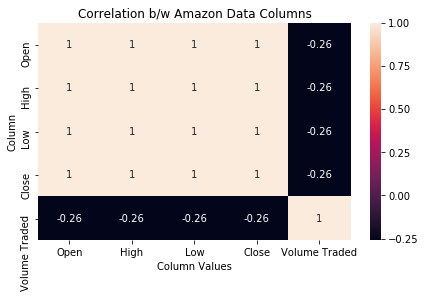

In [235]:
# Plot heatmap between the columns of dataframe
plt.figure(1 , figsize = (7 ,4))
cor = sns.heatmap(df_amazon.corr(), annot = True)
plt.xlabel("Column Values")
plt.ylabel("Column")
plt.title('Correlation b/w Amazon Data Columns')

#### Visualization 4 -
A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader. 
The plot above is correlation heatmap. It is telling how much the values of columns of the dataframe are correlated to each other. As the values are mostly 1, it tells that columns are highly correlated to each other. We can drop the highly correlated columns and can do prediction on single column as they are highly correlated, but we are keeping all the columns for linear regression.

In [236]:
# Rearranging the order of columns for analysis
df_amazon=df_amazon[["Close",'Open','High','Low','Volume Traded']]
df_amazon.head(2)

Close   Open   High    Low  Volume Traded
Date                                                 
1999-12-08   88.0  86.81   93.0  86.75     12867200.0
1999-12-09  103.6  95.25  113.0  93.44     41364600.0

In [237]:
#Let's select our features
x = df_amazon.loc[:,'Open':'Volume Traded']
y = df_amazon.loc[:,'Close']

In [238]:
# divide the data in 70;30 ratio for train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [239]:
# Applied linear regression on train data
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [240]:
# tested the accuracy of linear regression on test data
LR.score(x_test,y_test)

0.9999410414900155

#### Result -  From above we can see that our Linear regression score is 0.9999, which means that the model we trained on our train data has achieved an accuracy of 99.99 % when applied on the test data.

In [241]:
# Cross check the data on a random day
Test_data = [[92.5,93.38,86.06,11151200.0]]
prediction = LR.predict(Test_data)
print(prediction)

[88.46078155]


# ARIMA PREDICTION

An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

## Apple

#### Applying ARIMA on Apple Stock Data 

In [242]:
# Importing arima and stattools libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [243]:
# Dropping all the columns except 'Close' for analysis
data_apple = df_apple.drop(['Open','Low','High','Volume Traded'], axis=1)
data_apple = pd.Series(data_apple['Close'])

### Function to check stationarity

Statistical stationarity: A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.
ARIMA are built with the assumption that the series is stationary.
A quick check to see if your time series is non-stationary is to review summary statistics.

In [244]:
def stationarity_check(test_data):
    
    # Rolling statistics calculation
    roll_mean = test_data.rolling(30).mean()
    roll_std = test_data.rolling(5).std()
    # Dickey-Fuller test
    print('Dickey-Fuller test results\n')
    df_test = adfuller(test_data, regresults=False)
    test_result = pd.Series(df_test[0:4], index=['Test Statistic','p-value','# of lags','# of obs'])
    print(test_result)
    for x,y in df_test[4].items():
        print('Critical value at %s: %1.5f' %(x,y))

In [245]:
# checking stationarity
stationarity_check(data_apple)

Dickey-Fuller test results

Test Statistic      -1.944733
p-value              0.311319
# of lags            0.000000
# of obs          5033.000000
dtype: float64
Critical value at 1%: -3.43165
Critical value at 5%: -2.86211
Critical value at 10%: -2.56708


As Test statistic is greater than all critical values, the time series is clearly not stationary. Testing different transformations for stationarity is required before applying ARIMA model to time series.

#### Log transform of original time series

In [246]:
# Log transform time series
data_apple_log = np.log(data_apple)
# Check stationarity
data_apple_log.dropna(inplace=True)
stationarity_check(data_apple_log)

Dickey-Fuller test results

Test Statistic      -1.212663
p-value              0.668125
# of lags            0.000000
# of obs          5033.000000
dtype: float64
Critical value at 1%: -3.43165
Critical value at 5%: -2.86211
Critical value at 10%: -2.56708


The log transformation is not stationary as test statistic is greater than critical values.

#### Log differencing transformation of original time series

In [247]:
# Log Differencing
data_apple_log_diff = data_apple_log - data_apple_log.shift()
data_apple_log_diff.dropna(inplace=True)
#check Stationarity
stationarity_check(data_apple_log_diff)

Dickey-Fuller test results

Test Statistic     -71.936377
p-value              0.000000
# of lags            0.000000
# of obs          5032.000000
dtype: float64
Critical value at 1%: -3.43165
Critical value at 5%: -2.86211
Critical value at 10%: -2.56708


#### Simple differencing transformation of original time series

In [248]:
# Simple Differencing
data_apple_diff = data_apple - data_apple.shift()
data_apple_diff.dropna(inplace=True)
# check stationarity
stationarity_check(data_apple_diff)

Dickey-Fuller test results

Test Statistic     -70.642755
p-value              0.000000
# of lags            0.000000
# of obs          5032.000000
dtype: float64
Critical value at 1%: -3.43165
Critical value at 5%: -2.86211
Critical value at 10%: -2.56708


##### Out of all 4 tests results above, Log Differencing transformation yields a test statistic much lower than critical values, we will use this for applying ARIMA

## ARIMA Model Implementation

A non-seasonal ARIMA model is classified as an "ARIMA(p,d,q)" model, where:
p is the order of the AR term
q is the order of the MA term
d is the number of differencing required to make the time series stationary

So, ARIMA(1,1,0) is differenced first-order autoregressive model.This is a first-order autoregressive model with one order of non-seasonal differencing and a constant term--i.e., an ARIMA(1,1,0) model.

In [249]:
# Applying ARIMA on 'data_apple_log_diff' time series
model = ARIMA(data_apple_log_diff, (1,1,0))  
fit_model = model.fit(full_output=True)

In [250]:
# Predict values
predictions = model.predict(fit_model.params, start=5022, end=5032)
# Show model Summary
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 5032
Model:                 ARIMA(1, 1, 0)   Log Likelihood                8013.793
Method:                       css-mle   S.D. of innovations              0.049
Date:                Tue, 10 Dec 2019   AIC                         -16021.587
Time:                        10:24:02   BIC                         -16002.016
Sample:                             1   HQIC                        -16014.730
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.578e-06      0.000      0.016      0.987      -0.001       0.001
ar.L1.D.Close    -0.5056      0.012    -41.580      0.000      -0.529      -0.482
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9778           +0.0000j            1.9778            0.5000
-----------------------------------------------------------------------------
"""

In [251]:
# Re-transform fitted data back to original scale from Log differencing transformation scale
pred_model_diff = pd.Series(fit_model.fittedvalues, copy=True)
# Calculate cummulative sum of the fitted values (cummulative sum of differences)
pred_model_diff_cumsum = pred_model_diff.cumsum()
# Element-wise addition back to original time series
data_apple_trans = data_apple.add(pred_model_diff_cumsum, fill_value=0)

### Plot of orignal data and fitted values graphs

Text(0.5, 1.0, 'Apple Stock Actual Values')

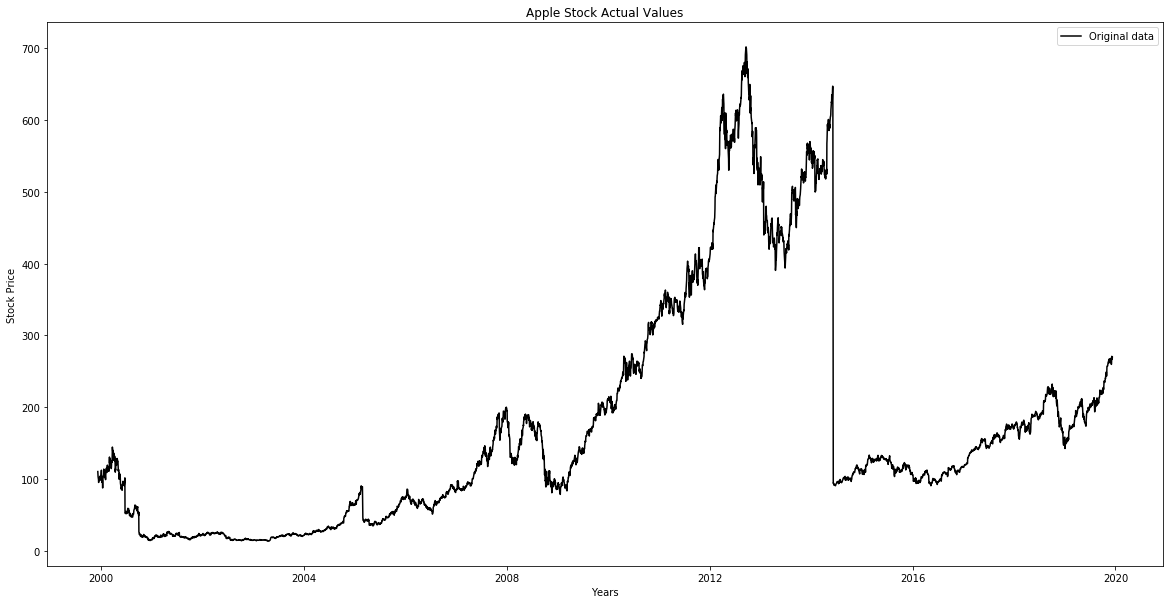

In [252]:
# Plot actual Values
plt.figure(figsize=(20,10))
plt.plot(data_apple, color='black', label='Original data')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.title('Apple Stock Actual Values')

Text(0.5, 1.0, 'Apple Stock Predicted Values')

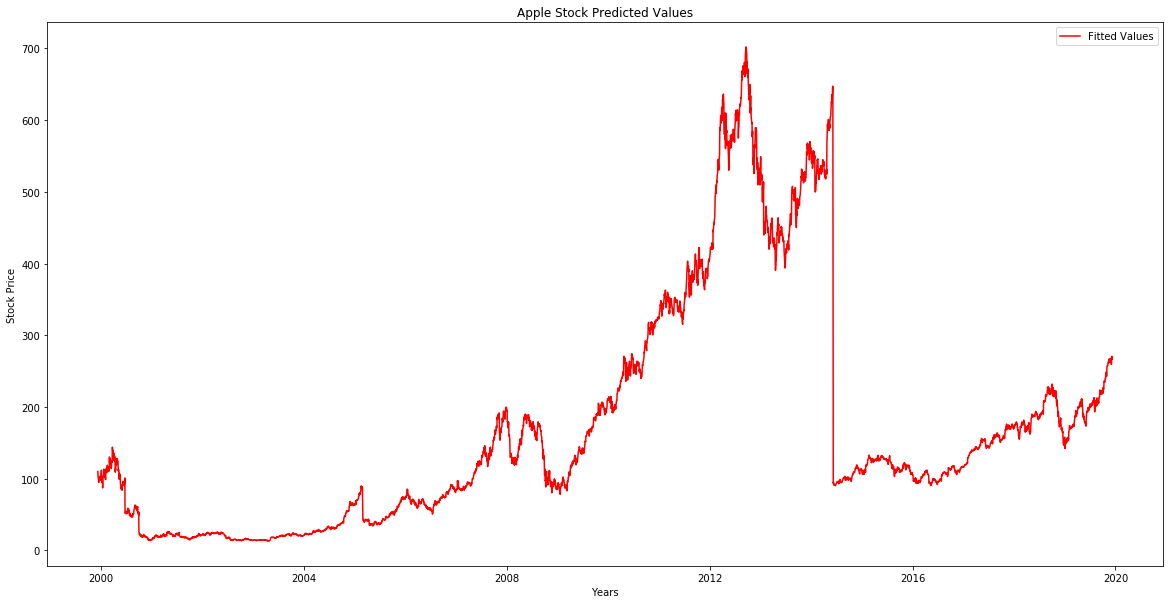

In [253]:
# Plot fitted values
plt.figure(figsize=(20,10))
plt.plot(data_apple_trans, color='red', label='Fitted Values')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.title('Apple Stock Predicted Values')

#### Visualization 5 -
The line graphs above shows the values of actual & fitted i.e predicted values from ARIMA model. The Red line is actual values and the black line is the predicted values. it shows that we have predicted approximately same values. 

But what is the error?
For that we have plotted a new graph below.

Text(0.5, 1.0, 'Error Check Plot')

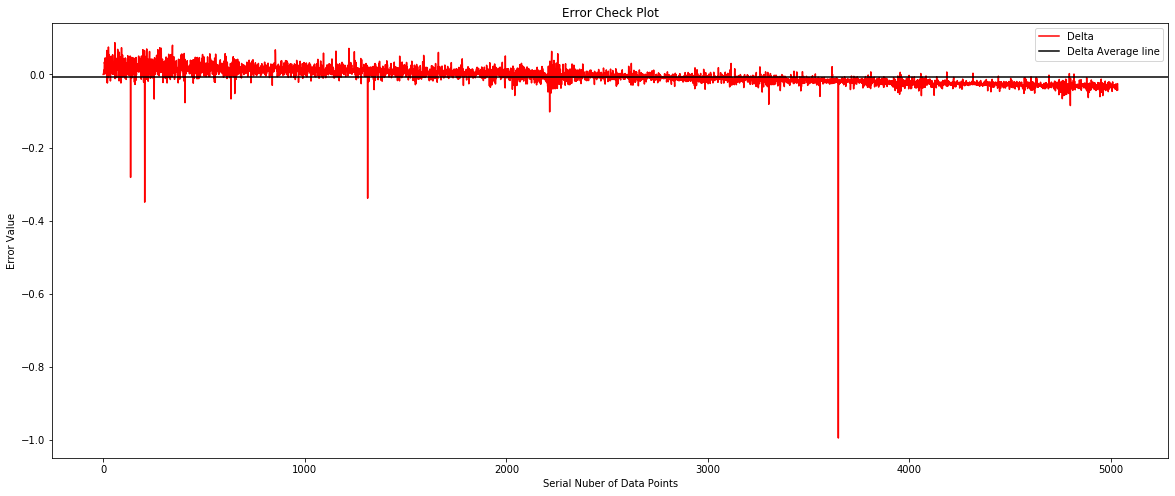

In [254]:
# Store values of of actual and fitted data in x, y
x = data_apple.values
y = data_apple_trans.values
# Plot trend of error
plt.figure(figsize=(20,8))
plt.plot((x - y), color='red', label='Delta')
plt.axhline((x-y).mean(), color='black', label='Delta Average line')
plt.legend()
plt.ylabel('Error Value')
plt.xlabel('Serial Nuber of Data Points')
plt.title('Error Check Plot')

#### Visualization 6 -
The graph above is showing the error between fiited and actual values. The black line above is the mean of all the erros and the red line is showing errors for individual points between actual and predicted values.

From above we can infer that the calculated mean error is approximately -$0.05, which mean our predictions are close to actual values

In [255]:
# Created a new dataframe for actual and predicted values apple stock close price for last 10 days
a=data_apple.tail(10)
b=data_apple_trans.tail(10)
predicted_apple=pd.DataFrame({'Actual Close':a,'Predicted Close':b})
# Print dataframe
predicted_apple

Actual Close  Predicted Close
Date                                     
2019-11-26        264.29       264.315920
2019-11-27        267.84       267.878684
2019-11-29        267.25       267.277985
2019-12-02        264.16       264.195858
2019-12-03        259.45       259.490635
2019-12-04        261.74       261.783862
2019-12-05        265.58       265.610334
2019-12-06        270.71       270.737425
2019-12-09        266.92       266.945127
2019-12-10        269.32       269.361940

## Similary, We applied Arima on Microsoft, Google, Facebook and Amazon Data

## Microsoft

In [256]:
# Dropping all the columns except 'Close' for analysis
data_microsoft = df_microsoft.drop(['Open','Low','High','Volume Traded'], axis=1)
data_microsoft = pd.Series(data_microsoft['Close'])

### Function to check stationarity

Statistical stationarity: A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.
ARIMA are built with the assumption that the series is stationary


We do a quick check to see if your time series is non-stationary is to review summary statistics.

In [257]:
# checking stationarity
stationarity_check(data_microsoft)

Dickey-Fuller test results

Test Statistic       0.949149
p-value              0.993699
# of lags           32.000000
# of obs          5001.000000
dtype: float64
Critical value at 1%: -3.43166
Critical value at 5%: -2.86212
Critical value at 10%: -2.56708


As Test statistic is greater than all critical values, the time series is clearly not stationary. Testing different transformations for stationarity is required before applying ARIMA model to time series.

Log transform of original time series

In [258]:
# Log transform time series
data_microsoft_log = np.log(data_microsoft)
# Check stationarity
data_microsoft_log.dropna(inplace=True)
stationarity_check(data_microsoft_log)

Dickey-Fuller test results

Test Statistic      -0.871714
p-value              0.797145
# of lags            6.000000
# of obs          5027.000000
dtype: float64
Critical value at 1%: -3.43165
Critical value at 5%: -2.86212
Critical value at 10%: -2.56708


The log transformation is not stationary as test statistic is greater than critical values and you can also visualize this on the 1st graph.
Log differencing transformation of original time series

Log differencing transformation of original time series

In [259]:
# Log Differencing
data_microsoft_log_diff = data_microsoft_log - data_microsoft_log.shift()
data_microsoft_log_diff.dropna(inplace=True)
# Check stationarity
stationarity_check(data_microsoft_log_diff)

Dickey-Fuller test results

Test Statistic     -29.411247
p-value              0.000000
# of lags            5.000000
# of obs          5027.000000
dtype: float64
Critical value at 1%: -3.43165
Critical value at 5%: -2.86212
Critical value at 10%: -2.56708


Simple differencing transformation of original time series

In [260]:
# Simple Differencing
data_microsoft_diff = data_microsoft - data_microsoft.shift()
data_microsoft_diff.dropna(inplace=True)
# Check stationarity
stationarity_check(data_microsoft_diff)

Dickey-Fuller test results

Test Statistic   -1.333538e+01
p-value           6.066953e-25
# of lags         3.100000e+01
# of obs          5.001000e+03
dtype: float64
Critical value at 1%: -3.43166
Critical value at 5%: -2.86212
Critical value at 10%: -2.56708


##### Out of all 4 tests results above, Log Differencing Transformation yields a test statistic much lower than critical values, we will use this for applying ARIMA

## ARIMA Model Implementation

A non-seasonal ARIMA model is classified as an "ARIMA(p,d,q)" model, where:
p is the order of the AR term
q is the order of the MA term
d is the number of differencing required to make the time series stationary

So, ARIMA(1,1,0) is differenced first-order autoregressive model. This is a first-order autoregressive model with one order of non-seasonal differencing and a constant term--i.e., an ARIMA(1,1,0) model.

In [261]:
# Applying ARIMA on 'data_microsoft_log_diff' time series
model = ARIMA(data_microsoft_log_diff, (1,1,0))
fit_model = model.fit(full_output=True)

In [262]:
# Predict values
predictions = model.predict(fit_model.params, start=5022, end=5032)
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 5032
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11157.602
Method:                       css-mle   S.D. of innovations              0.026
Date:                Tue, 10 Dec 2019   AIC                         -22309.205
Time:                        10:24:06   BIC                         -22289.634
Sample:                             1   HQIC                        -22302.348
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.262e-06      0.000     -0.009      0.993      -0.000       0.000
ar.L1.D.Close    -0.5087      0.012    -41.919      0.000      -0.532      -0.485
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9660           +0.0000j            1.9660            0.5000
-----------------------------------------------------------------------------
"""

In [263]:
# Re-transform fitted data back to original scale from Log differencing transformation scale
pred_model_diff = pd.Series(fit_model.fittedvalues, copy=True)
# Calculate cummulative sum of the fitted values (cummulative sum of differences)
pred_model_diff_cumsum = pred_model_diff.cumsum()
# Element-wise addition back to original time series
data_microsoft_trans = data_microsoft.add(pred_model_diff_cumsum, fill_value=0)

### Plot of orignal data and fitted values graphs

Text(0.5, 1.0, 'Microsoft Stock Actual Values')

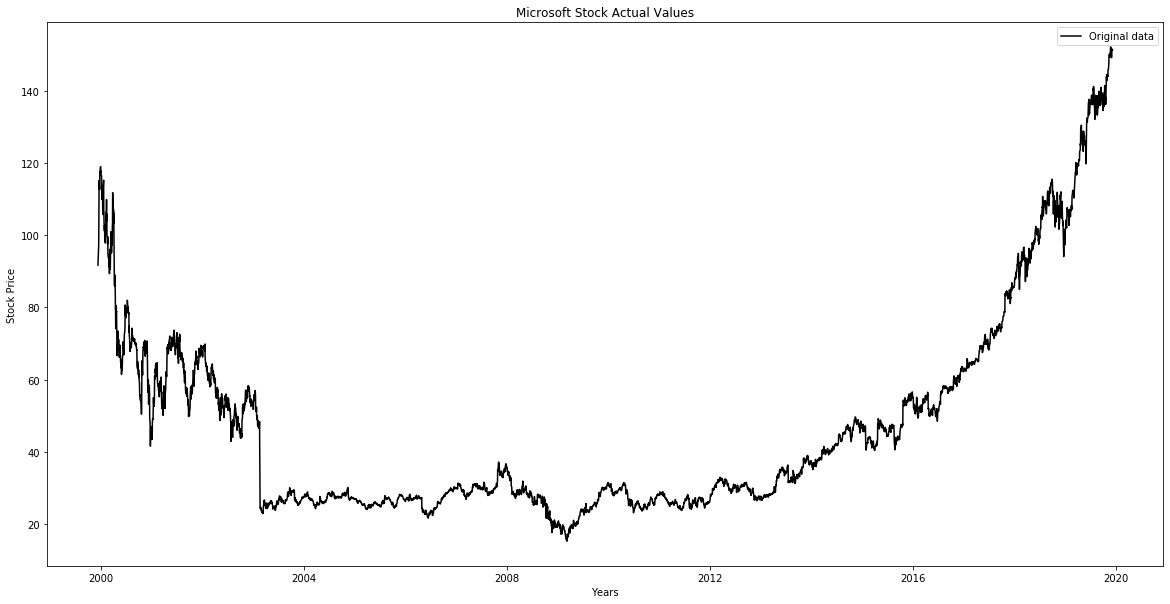

In [264]:
# Plot original Values
plt.figure(figsize=(20,10))
plt.plot(data_microsoft, color='black', label='Original data')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Actual Values')

Text(0.5, 1.0, 'Microsoft Stock Predicted Values')

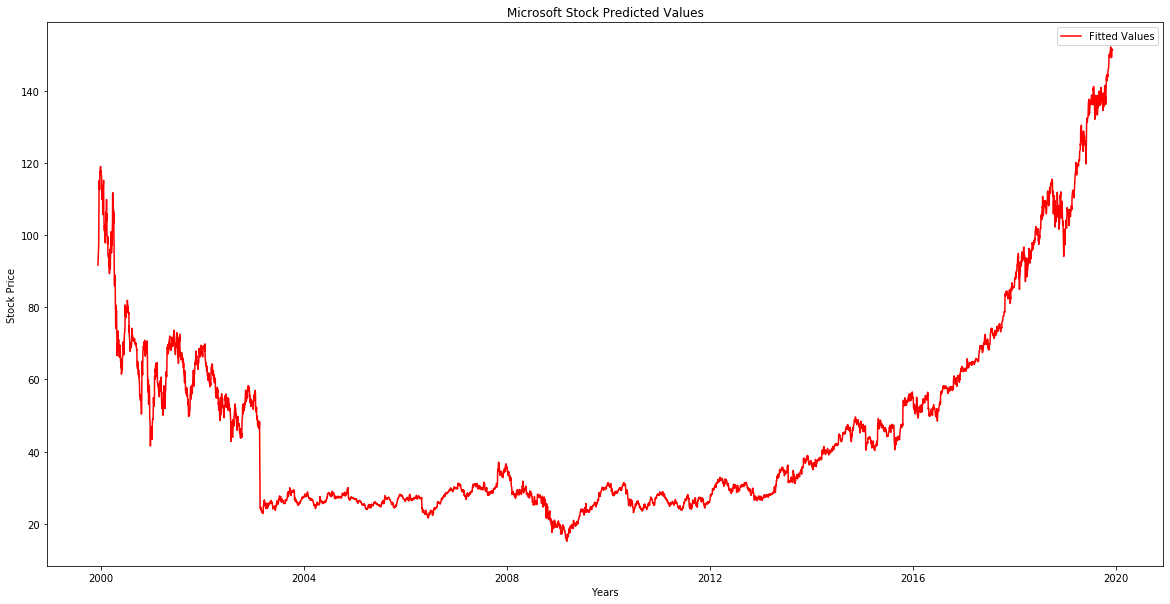

In [265]:
# Plot predicted values
plt.figure(figsize=(20,10))
plt.plot(data_microsoft_trans, color='red', label='Fitted Values')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Predicted Values')

#### Visualization 5 - 
The line graphs above shows the values of actual & fitted i.e predicted values from ARIMA model. The Red line is actual values and the black line is the predicted values. it shows that we have predicted approximately same values. 

But what is the error?
For that we have plotted a new graph below.

Text(0.5, 1.0, 'Error Check Plot')

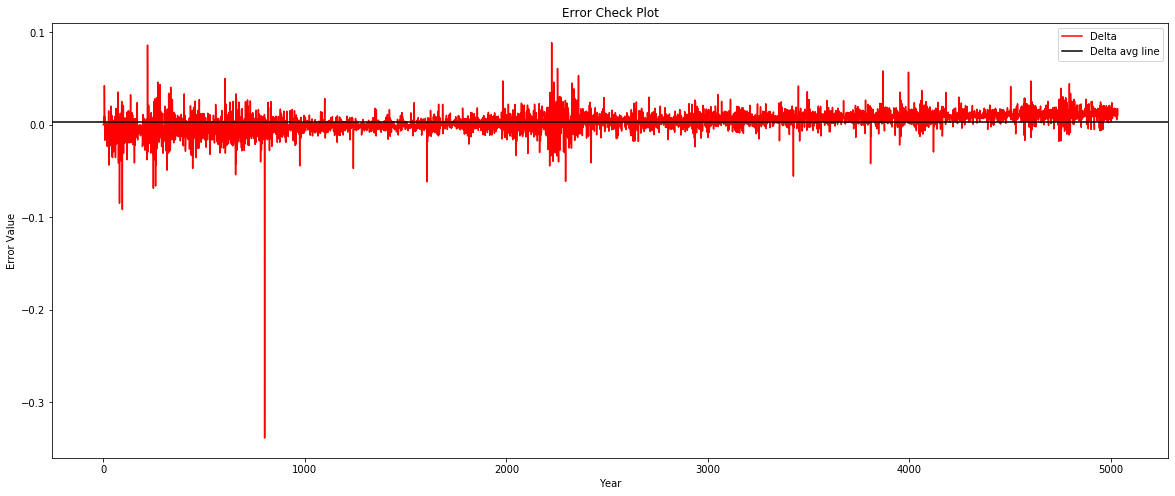

In [266]:
# Store values of of actual and fitted data in x, y
x = data_microsoft.values
y = data_microsoft_trans.values
# Trend of error
plt.figure(figsize=(20,8))
plt.plot((x - y), color='red', label='Delta')
plt.axhline((x-y).mean(), color='black', label='Delta avg line')
plt.legend()
plt.ylabel('Error Value')
plt.xlabel('Year')
plt.title('Error Check Plot')

#### Visualization 6 - 
The graph above is showing the error between fitted and actual values. The black line above is the mean of all the erros and the red line is showing errors for individual points between actual and predicted values.

From above we can infer that the calculated mean error is approximately -$0.02, which mean our predictions are close to actual values

In [267]:
# Created a new dataframe for actual and predicted values microsoft stock close price for last 10 days
a=data_microsoft.tail(10)
b=data_microsoft_trans.tail(10)
predicted_microsoft=pd.DataFrame({'Actual Close':a,'Predicted Close':b})
predicted_microsoft

Actual Close  Predicted Close
Date                                     
2019-11-26        152.03       152.012827
2019-11-27        152.32       152.305686
2019-11-29        151.38       151.367397
2019-12-02        149.55       149.541512
2019-12-03        149.31       149.304546
2019-12-04        149.85       149.839173
2019-12-05        149.93       149.916517
2019-12-06        151.75       151.738078
2019-12-09        151.36       151.342209
2019-12-10        151.53       151.519652

### Google

In [268]:
# Dropping all the columns except 'Close' for analysis
data_google = df_google.drop(['Open','Low','High','Volume Traded'], axis=1)
data_google = pd.Series(data_google['Close'])

### Function to check stationarity

Statistical stationarity: A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, are all constant over time.
ARIMA are built with the assumption that the series is stationary.

We do a quick check to see if your time series is non-stationary is to review summary statistics

In [269]:
# checking stationarity
stationarity_check(data_google)

Dickey-Fuller test results

Test Statistic      -1.274499
p-value              0.640757
# of lags            2.000000
# of obs          3852.000000
dtype: float64
Critical value at 1%: -3.43205
Critical value at 5%: -2.86229
Critical value at 10%: -2.56717


As Test statistic is greater than all critical values, the time series is clearly not stationary. Testing different transformations for stationarity is required before applying ARIMA model to time series.

Log transform of original time series

In [270]:
# Log transform time series
data_google_log = np.log(data_google)
# Check stationarity
data_google_log.dropna(inplace=True)
stationarity_check(data_google_log)

Dickey-Fuller test results

Test Statistic      -3.209401
p-value              0.019447
# of lags            1.000000
# of obs          3853.000000
dtype: float64
Critical value at 1%: -3.43205
Critical value at 5%: -2.86229
Critical value at 10%: -2.56717


The log transformation is not stationary as test statistic is greater than critical values.

Log differencing transformation of original time series

In [271]:
# Log Differencing
data_google_log_diff = data_google_log - data_google_log.shift()
data_google_log_diff.dropna(inplace=True)
stationarity_check(data_google_log_diff)

Dickey-Fuller test results

Test Statistic     -60.602278
p-value              0.000000
# of lags            0.000000
# of obs          3853.000000
dtype: float64
Critical value at 1%: -3.43205
Critical value at 5%: -2.86229
Critical value at 10%: -2.56717


Simple differencing transformation of original time series

In [272]:
# Simple Differencing
data_google_diff = data_google - data_google.shift()
data_google_diff.dropna(inplace=True)
stationarity_check(data_google_diff)

Dickey-Fuller test results

Test Statistic     -44.716402
p-value              0.000000
# of lags            1.000000
# of obs          3852.000000
dtype: float64
Critical value at 1%: -3.43205
Critical value at 5%: -2.86229
Critical value at 10%: -2.56717


##### Out of all 4 tests results above, Log Differencing Transformation yields a test statistic much lower than critical values, we will use this for applying ARIMA

## ARIMA Model Implementation

A nonseasonal ARIMA model is classified as an "ARIMA(p,d,q)" model, where:
p is the order of the AR term
q is the order of the MA term
d is the number of differencing required to make the time series stationary

So, ARIMA(1,1,0) is differenced first-order autoregressive model.This is a first-order autoregressive model with one order of nonseasonal differencing and a constant term--i.e., an ARIMA(1,1,0) model.

In [273]:
# Applying ARIMA on 'data_google_log_diff' time series
model = ARIMA(data_google_log_diff, (1,1,0))
fit_model = model.fit(full_output=True)

In [274]:
# Predict values
predictions = model.predict(fit_model.params, start=3840, end=3850)
# Show model Summary
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 3853
Model:                 ARIMA(1, 1, 0)   Log Likelihood                8498.641
Method:                       css-mle   S.D. of innovations              0.027
Date:                Tue, 10 Dec 2019   AIC                         -16991.282
Time:                        10:24:08   BIC                         -16972.512
Sample:                             1   HQIC                        -16984.616
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.37e-05      0.000     -0.047      0.962      -0.001       0.001
ar.L1.D.Close    -0.4798      0.014    -33.928      0.000      -0.508      -0.452
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0842           +0.0000j            2.0842            0.5000
-----------------------------------------------------------------------------
"""

In [275]:
# Re-transform fitted data back to original scale from Log differencing transformation scale
pred_model_diff = pd.Series(fit_model.fittedvalues, copy=True)
# Calculate cummulative sum of the fitted values (cummulative sum of differences)
pred_model_diff_cumsum = pred_model_diff.cumsum()
# Element-wise addition back to original time series
data_google_trans = data_google.add(pred_model_diff_cumsum, fill_value=0)

### Plot of orignal data and fitted values graphs

Text(0.5, 1.0, 'Google Stock Prediction Comparison')

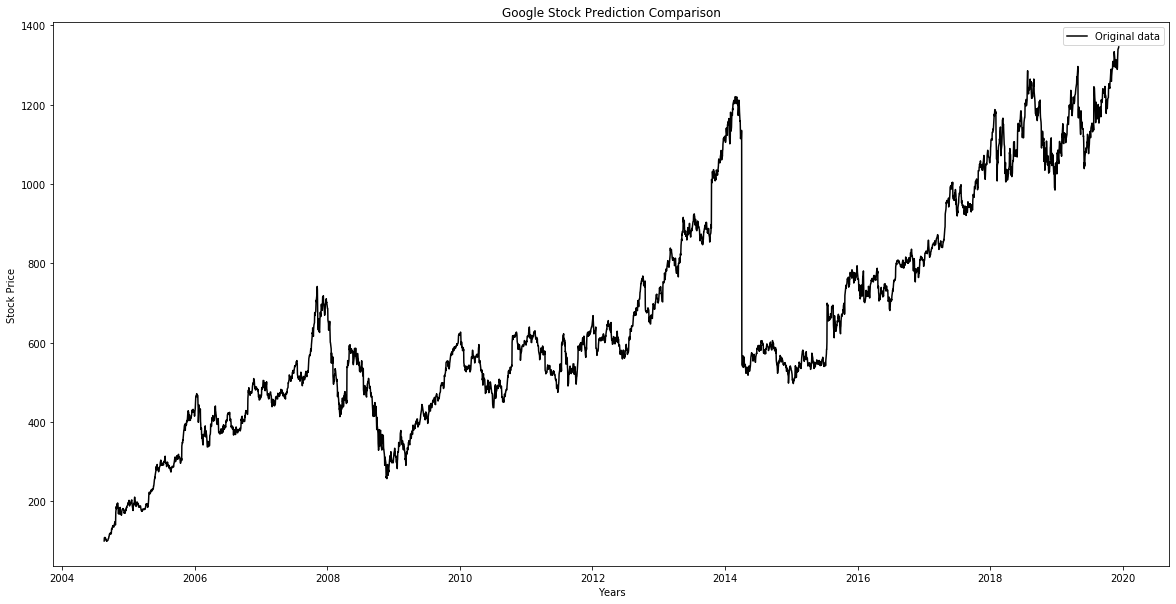

In [276]:
# Plot of orignal data values
plt.figure(figsize=(20,10))
plt.plot(data_google, color='black', label='Original data')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.title('Google Stock Prediction Comparison')

Text(0.5, 1.0, 'Google Stock Prediction Comparison')

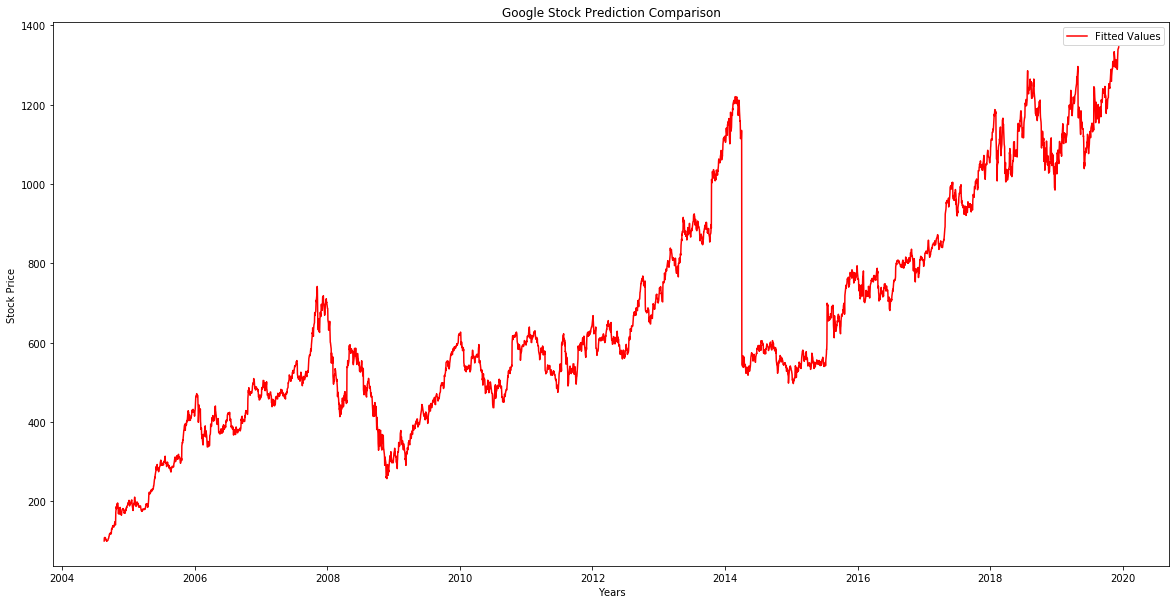

In [277]:
# Plot fitted values
plt.figure(figsize=(20,10))
plt.plot(data_google_trans, color='red', label='Fitted Values')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.title('Google Stock Prediction Comparison')

#### Visualization 5 -
The line graphs above shows the values of actual & fitted i.e predicted values from ARIMA model. The Red line is actual values and the black line is the predicted values. it shows that our prediction is very close to the actual values. 

But what is the error?
For that we have plotted a new graph below.

Text(0.5, 1.0, 'Error Check Plot')

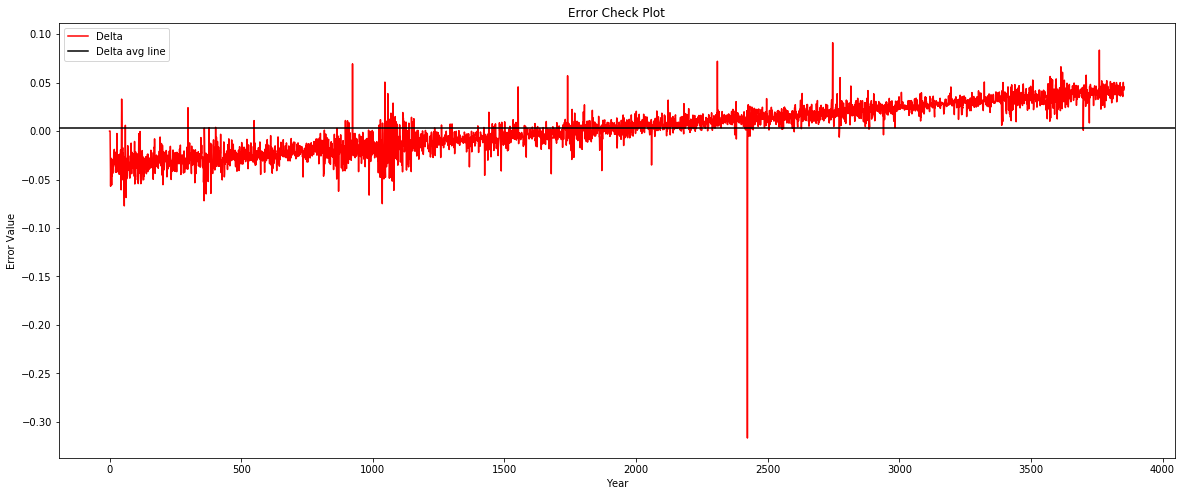

In [278]:
# Store values of of actual and fitted data in x, y
x = data_google.values
y = data_google_trans.values
# Trend of error
plt.figure(figsize=(20,8))
plt.plot((x - y), color='red', label='Delta')
plt.axhline((x-y).mean(), color='black', label='Delta avg line')
plt.legend()
plt.ylabel('Error Value')
plt.xlabel('Year')
plt.title('Error Check Plot')

#### Visualization 6 -
The graph above is showing the error between fitted and actual values. The black line above is the mean of all the erros and the red line is showing errors for individual points between actual and predicted values.

From above we can infer that the calculated mean error is approximately -$0.005, which mean our predictions are close to actual values

In [279]:
# Created a new dataframe for actual and predicted values Google stock close price for last 10 days
a=data_google.tail(10)
b=data_google_trans.tail(10)
predicted_google=pd.DataFrame({'Actual Close':a,'Predicted Close':b})
predicted_google

Actual Close  Predicted Close
Date                                     
2019-11-26       1313.00      1312.954339
2019-11-27       1312.13      1312.086040
2019-11-29       1304.09      1304.049035
2019-12-02       1288.86      1288.821646
2019-12-03       1294.74      1294.704313
2019-12-04       1318.94      1318.896472
2019-12-05       1326.96      1326.909751
2019-12-06       1339.39      1339.345707
2019-12-09       1342.99      1342.944122
2019-12-10       1345.56      1345.517287

## Facebook

In [280]:
# Dropping all the columns except 'Close' for analysis
data_fb = df_fb.drop(['Open','Low','High','Volume Traded'], axis=1)
data_fb = pd.Series(data_fb['Close'])

### Function to check stationarity

Statistical stationarity: A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.
ARIMA are built with the assumption that the series is stationary
A quick check to see if your time series is non-stationary is to review summary statistics.

In [281]:
# checking stationarity
stationarity_check(data_fb)

Dickey-Fuller test results

Test Statistic      -0.581961
p-value              0.875006
# of lags            0.000000
# of obs          1902.000000
dtype: float64
Critical value at 1%: -3.43379
Critical value at 5%: -2.86306
Critical value at 10%: -2.56758


As Test statistic is greater than all critical values, the time series is clearly not stationary. Testing different transformations for stationarity is required before applying ARIMA model to time series.

Log transform of original time series

In [282]:
# Log transform time series
data_fb_log = np.log(data_fb)
# Check stationarity
data_fb_log.dropna(inplace=True)
stationarity_check(data_fb_log)

Dickey-Fuller test results

Test Statistic      -0.800418
p-value              0.818999
# of lags            0.000000
# of obs          1902.000000
dtype: float64
Critical value at 1%: -3.43379
Critical value at 5%: -2.86306
Critical value at 10%: -2.56758


The log transformation is not stationary as test statistic is greater than critical values.

Log differencing transformation of original time series

In [283]:
# Log Differencing
data_fb_log_diff = data_fb_log - data_fb_log.shift()
data_fb_log_diff.dropna(inplace=True)
# Check stationarity
stationarity_check(data_fb_log_diff)

Dickey-Fuller test results

Test Statistic     -43.560219
p-value              0.000000
# of lags            0.000000
# of obs          1901.000000
dtype: float64
Critical value at 1%: -3.43379
Critical value at 5%: -2.86306
Critical value at 10%: -2.56758


Simple differencing transformation of original time series

In [284]:
# Simple Differencing
data_fb_diff = data_fb - data_fb.shift()
data_fb_diff.dropna(inplace=True)
# Check stationarity
stationarity_check(data_fb_diff)

Dickey-Fuller test results

Test Statistic     -44.435007
p-value              0.000000
# of lags            0.000000
# of obs          1901.000000
dtype: float64
Critical value at 1%: -3.43379
Critical value at 5%: -2.86306
Critical value at 10%: -2.56758


##### Out of all 4 tests results above Simple Differencing yields a test statistic much lower than critical values, we will use this for applying ARIMA

## ARIMA Model Implementation

A nonseasonal ARIMA model is classified as an "ARIMA(p,d,q)" model, where:
p is the order of the AR term
q is the order of the MA term
d is the number of differencing required to make the time series stationary

So, ARIMA(1,1,0) is differenced first-order autoregressive model.This is a first-order autoregressive model with one order of nonseasonal differencing and a constant term--i.e., an ARIMA(1,1,0) model.

In [285]:
# Applying ARIMA on 'data_apple_log_diff' time series
model = ARIMA(data_fb_diff, (1,1,0))
fit_model = model.fit(full_output=True)

In [286]:
# Predict values
predictions = model.predict(fit_model.params, start=1888, end=1898)
# Show model Summary
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1901
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4673.124
Method:                       css-mle   S.D. of innovations              2.827
Date:                Tue, 10 Dec 2019   AIC                           9352.249
Time:                        10:24:11   BIC                           9368.899
Sample:                             1   HQIC                          9358.378
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0018      0.043      0.041      0.967      -0.083       0.086
ar.L1.D.Close    -0.5014      0.020    -25.282      0.000      -0.540      -0.463
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9943           +0.0000j            1.9943            0.5000
-----------------------------------------------------------------------------
"""

In [287]:
# Re-transform fitted data back to original scale from Log differencing transformation scale
pred_model_diff = pd.Series(fit_model.fittedvalues, copy=True)
# Calculate cummulative sum of the fitted values (cummulative sum of differences)
pred_model_diff_cumsum = pred_model_diff.cumsum()
# Element-wise addition back to original time series
data_fb_trans = data_fb.add(pred_model_diff_cumsum, fill_value=0)

### Plot of orignal data and fitted values graphs

Text(0.5, 1.0, 'Facebook Stock Actual Values')

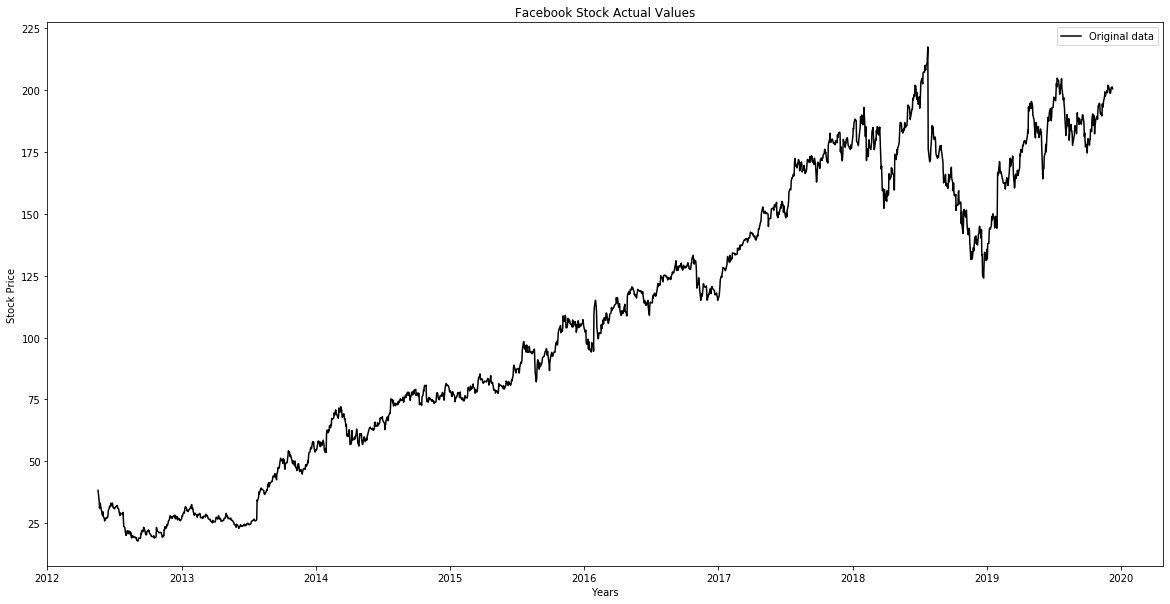

In [288]:
# Plot Original data values
plt.figure(figsize=(20,10))
plt.plot(data_fb, color='black', label='Original data')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.title('Facebook Stock Actual Values')

Text(0.5, 1.0, 'Facebook Stock Predicted Values')

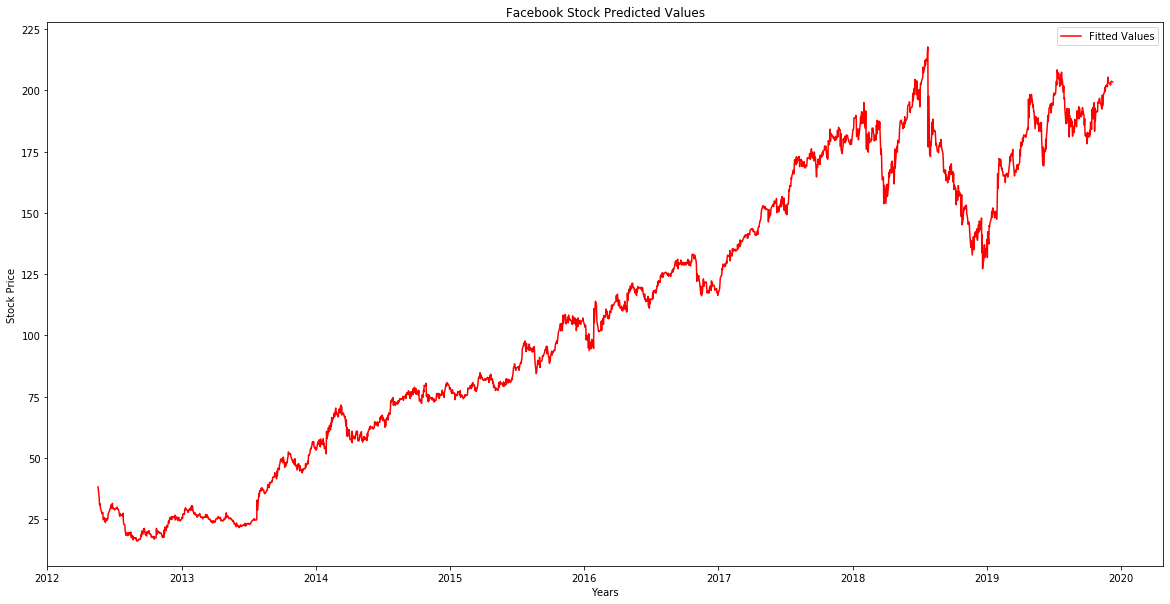

In [289]:
# Plot of fitted values
plt.figure(figsize=(20,10))
plt.plot(data_fb_trans, color='red', label='Fitted Values')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.title('Facebook Stock Predicted Values')

#### Visualization 5 -
The line graphs above shows the values of actual & fitted i.e predicted values from ARIMA model. The Red line is actual values and the black line is the predicted values. It shows that our prediction is almost perfect.

But what is the error?
For that we have plotted a new graph below.

Text(0.5, 1.0, 'Error Check Plot')

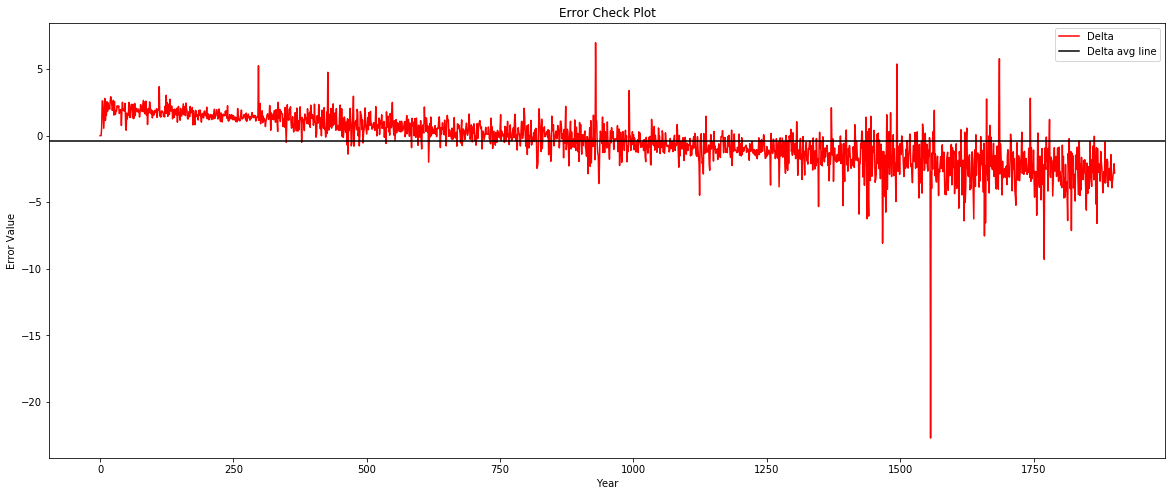

In [290]:
# Store values of of actual and fitted data in x, y
x = data_fb.values
y = data_fb_trans.values
# Trend of error
plt.figure(figsize=(20,8))
plt.plot((x - y), color='red', label='Delta')
plt.axhline((x-y).mean(), color='black', label='Delta avg line')
plt.legend()
plt.ylabel('Error Value')
plt.xlabel('Year')
plt.title('Error Check Plot')

##### Visualization 6 -
The graph above is showing the error between fiited and actual values. The black line above is the mean of all the erros and the red line is showing errors for individual points between actual and predicted values.
From above we can infer that the calculated mean error is approximately -$2, which mean our predictions are close to actual values

In [291]:
# Created a new dataframe for actual and predicted values apple stock close price for last 10 days
a=data_fb.tail(10)
b=data_fb_trans.tail(10)
predicted_fb=pd.DataFrame({'Actual Close':a,'Predicted Close':b})
predicted_fb

Actual Close  Predicted Close
Date                                     
2019-11-26        198.97       201.420258
2019-11-27        202.00       205.350477
2019-11-29        201.64       203.062653
2019-12-02        199.70       202.825153
2019-12-03        198.82       202.740072
2019-12-04        198.71       202.101227
2019-12-05        199.36       202.367795
2019-12-06        201.05       203.679377
2019-12-09        201.34       203.450561
2019-12-10        200.54       203.355223

## Amazon

In [292]:
# Dropping all the columns except 'Close' for analysis
data_amazon = df_amazon.drop(['Open','Low','High','Volume Traded'], axis=1)
data_amazon = pd.Series(data_amazon['Close'])

### Function to check stationarity

Statistical stationarity: A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.
ARIMA are built with the assumption that the series is stationary
A quick check to see if your time series is non-stationary is to review summary statistics.

In [293]:
# checking stationarity
stationarity_check(data_amazon)

Dickey-Fuller test results

Test Statistic       1.904012
p-value              0.998534
# of lags           32.000000
# of obs          5001.000000
dtype: float64
Critical value at 1%: -3.43166
Critical value at 5%: -2.86212
Critical value at 10%: -2.56708


In [294]:
# Log transform time series
data_amazon_log = np.log(data_amazon)
# Check stationarity
data_amazon_log.dropna(inplace=True)
stationarity_check(data_amazon_log)

Dickey-Fuller test results

Test Statistic       0.340349
p-value              0.979122
# of lags           28.000000
# of obs          5005.000000
dtype: float64
Critical value at 1%: -3.43166
Critical value at 5%: -2.86212
Critical value at 10%: -2.56708


The log transformation is not stationary as test statistic is greater than critical values

Log differencing transformation of original time series

In [295]:
# Log Differencing
data_amazon_log_diff = data_amazon_log - data_amazon_log.shift()
data_amazon_log_diff.dropna(inplace=True)
# Check stationarity
stationarity_check(data_amazon_log_diff)

Dickey-Fuller test results

Test Statistic   -1.191638e+01
p-value           5.153019e-22
# of lags         3.200000e+01
# of obs          5.000000e+03
dtype: float64
Critical value at 1%: -3.43166
Critical value at 5%: -2.86212
Critical value at 10%: -2.56708


In [296]:
# Simple Differencing
data_amazon_diff = data_amazon - data_amazon.shift()
data_amazon_diff.dropna(inplace=True)
# Check stationarity
stationarity_check(data_amazon_diff)

Dickey-Fuller test results

Test Statistic   -1.157000e+01
p-value           3.118872e-21
# of lags         3.200000e+01
# of obs          5.000000e+03
dtype: float64
Critical value at 1%: -3.43166
Critical value at 5%: -2.86212
Critical value at 10%: -2.56708


##### Out of all 4 tests results above, Log Differencing Transformation yields a test statistic much lower than critical values, we will use this for applying ARIMA

## ARIMA Model Implementation

A non-seasonal ARIMA model is classified as an "ARIMA(p,d,q)" model, where:
p is the order of the AR term
q is the order of the MA term
d is the number of differencing required to make the time series stationary.

So, ARIMA(1,1,0) is differenced first-order autoregressive model.This is a first-order autoregressive model with one order of nonseasonal differencing and a constant term--i.e., an ARIMA(1,1,0) model.

In [297]:
# Applying ARIMA on 'data_apple_log_diff' time series
model = ARIMA(data_amazon_log_diff, (1,1,0))
fit_model = model.fit(full_output=True)

In [298]:
# Predict values
predictions = model.predict(fit_model.params, start=5022, end=5032)
# Show model Summary
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 5032
Model:                 ARIMA(1, 1, 0)   Log Likelihood                8975.752
Method:                       css-mle   S.D. of innovations              0.041
Date:                Tue, 10 Dec 2019   AIC                         -17945.505
Time:                        10:24:15   BIC                         -17925.934
Sample:                             1   HQIC                        -17938.648
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.405e-05      0.000     -0.062      0.951      -0.001       0.001
ar.L1.D.Close    -0.4711      0.012    -37.854      0.000      -0.496      -0.447
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1226           +0.0000j            2.1226            0.5000
-----------------------------------------------------------------------------
"""

In [299]:
# Re-transform fitted data back to original scale from Log differencing transformation scale
pred_model_diff = pd.Series(fit_model.fittedvalues, copy=True)
# Calculate cummulative sum of the fitted values (cummulative sum of differences)
pred_model_diff_cumsum = pred_model_diff.cumsum()
# Element-wise addition back to original time series
data_amazon_trans = data_amazon.add(pred_model_diff_cumsum, fill_value=0)

### Plot of orignal data and fitted values graphs

Text(0.5, 1.0, 'Amazon Stock Actual Values')

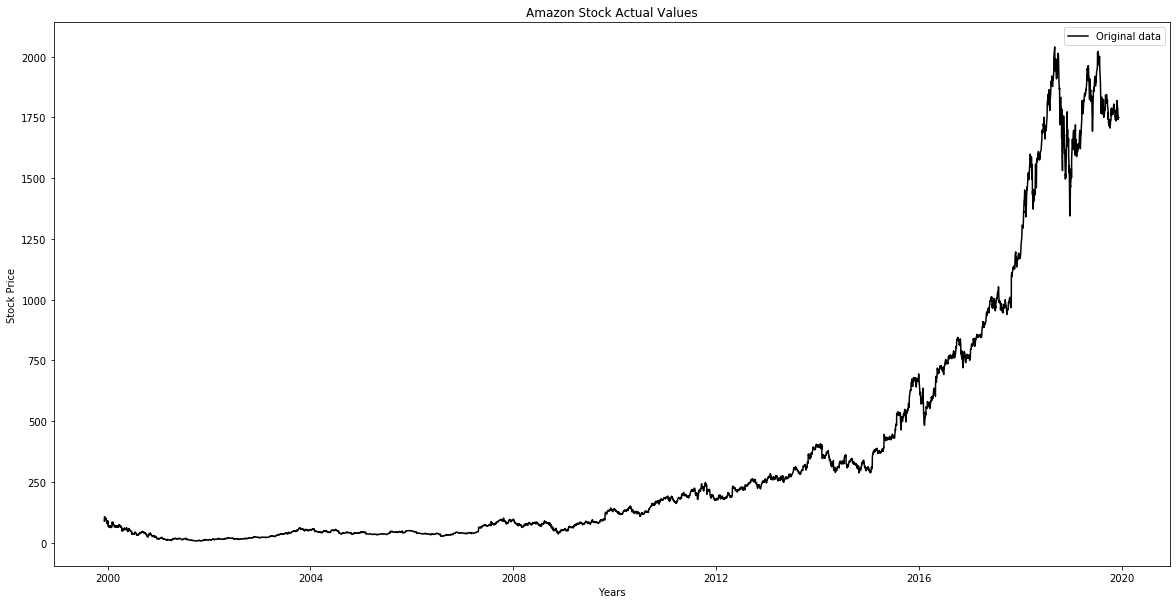

In [300]:
# Plot Original data values
plt.figure(figsize=(20,10))
plt.plot(data_amazon, color='black', label='Original data')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.title('Amazon Stock Actual Values')

Text(0.5, 1.0, 'Amazon Stock Predicted Values')

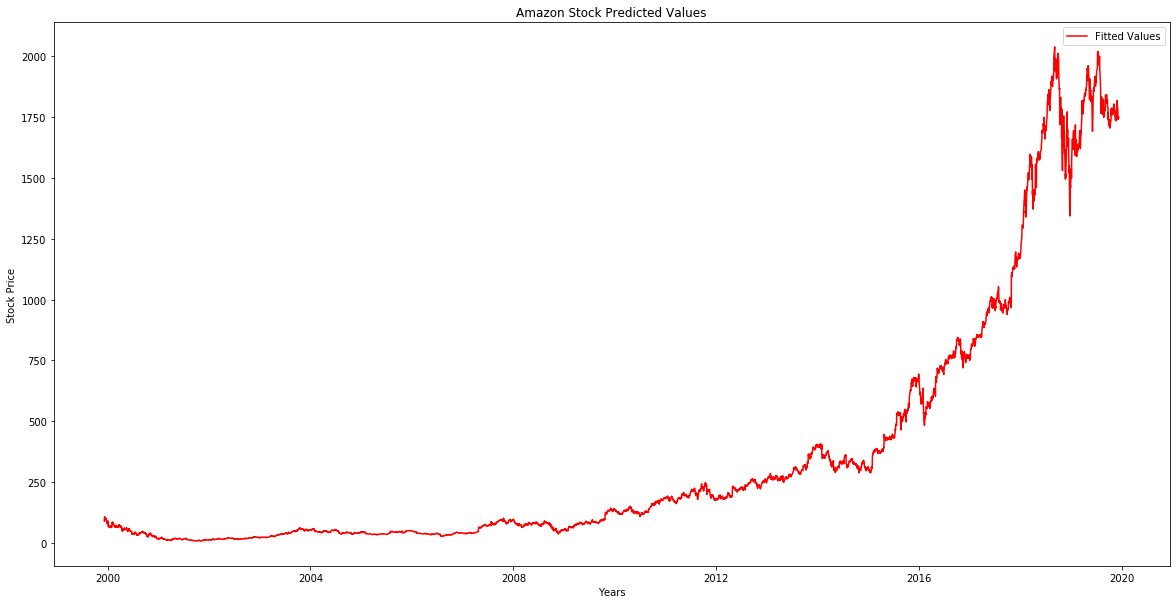

In [301]:
# Plot fitted values
plt.figure(figsize=(20,10))
plt.plot(data_amazon_trans, color='red', label='Fitted Values')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.title('Amazon Stock Predicted Values')

#### Visualization 5 - 
The line graphs above shows the values of actual & fiited i.e predicted values from ARIMA model. The Red line is actual values and the black line is the predicted values. it shows that we have predicted approximately same values. but what is the error?
For that we have plotted a new graph below.

Text(0.5, 1.0, 'Error Check Plot')

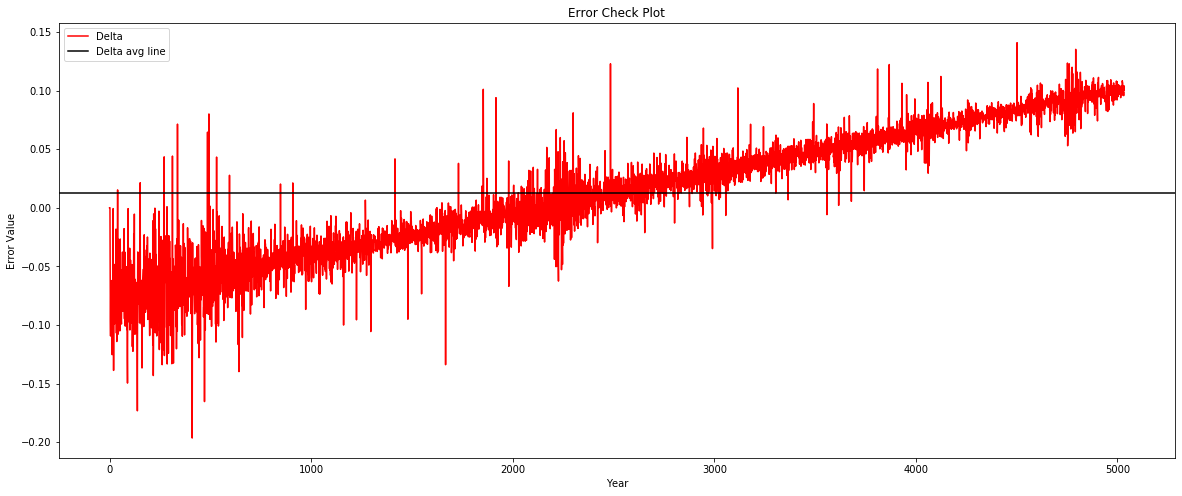

In [302]:
# Store values of of actual and fitted data in x, y
x = data_amazon.values
y = data_amazon_trans.values
# Trend of error
plt.figure(figsize=(20,8))
plt.plot((x - y), color='red', label='Delta')
plt.axhline((x-y).mean(), color='black', label='Delta avg line')
plt.legend()
plt.ylabel('Error Value')
plt.xlabel('Year')
plt.title('Error Check Plot')

##### Visualization 6 -
The graph above is showing the error between fiited and actual values. The black line above is the mean of all the erros and the red line is showing errors for individual points between actual and predicted values.

From above we can infer that the calculated mean error is approximately $0.01, which mean our predictions are close to actual values

In [303]:
# Created a new dataframe for actual and predicted values apple stock close price for last 10 days
a=data_amazon.tail(10)
b=data_amazon_trans.tail(10)
predicted_amazon=pd.DataFrame({'Actual Close':a,'Predicted Close':b})
predicted_amazon

Actual Close  Predicted Close
Date                                     
2019-11-26      1796.940      1796.831624
2019-11-27      1818.510      1818.403021
2019-11-29      1800.800      1800.693460
2019-12-02      1781.600      1781.503656
2019-12-03      1769.960      1769.864060
2019-12-04      1760.690      1760.592063
2019-12-05      1740.480      1740.381413
2019-12-06      1751.600      1751.504343
2019-12-09      1749.510      1749.405868
2019-12-10      1748.895      1748.794396

#### Created a Final Dataframe with predicted and Actual values of all 5 Tech Companies

In [304]:
pd.concat([predicted_apple, predicted_microsoft,predicted_google,predicted_fb,predicted_amazon], keys=['Apple', 'Microsoft','Google','Facebook','Amazon'], axis=1)

Apple                    Microsoft                  \
           Actual Close Predicted Close Actual Close Predicted Close   
Date                                                                   
2019-11-26       264.29      264.315920       152.03      152.012827   
2019-11-27       267.84      267.878684       152.32      152.305686   
2019-11-29       267.25      267.277985       151.38      151.367397   
2019-12-02       264.16      264.195858       149.55      149.541512   
2019-12-03       259.45      259.490635       149.31      149.304546   
2019-12-04       261.74      261.783862       149.85      149.839173   
2019-12-05       265.58      265.610334       149.93      149.916517   
2019-12-06       270.71      270.737425       151.75      151.738078   
2019-12-09       266.92      266.945127       151.36      151.342209   
2019-12-10       269.32      269.361940       151.53      151.519652   

                 Google                     Facebook                  \
           Actual Close Predicted Close Actual Close Predicted Close   
Date                                                                   
2019-11-26      1313.00     1312.954339       198.97      201.420258   
2019-11-27      1312.13     1312.086040       202.00      205.350477   
2019-11-29      1304.09     1304.049035       201.64      203.062653   
2019-12-02      1288.86     1288.821646       199.70      202.825153   
2019-12-03      1294.74     1294.704313       198.82      202.740072   
2019-12-04      1318.94     1318.896472       198.71      202.101227   
2019-12-05      1326.96     1326.909751       199.36      202.367795   
2019-12-06      1339.39     1339.345707       201.05      203.679377   
2019-12-09      1342.99     1342.944122       201.34      203.450561   
2019-12-10      1345.56     1345.517287       200.54      203.355223   

                 Amazon                  
           Actual Close Predicted Close  
Date                                     
2019-11-26     1796.940     1796.831624  
2019-11-27     1818.510     1818.403021  
2019-11-29     1800.800     1800.693460  
2019-12-02     1781.600     1781.503656  
2019-12-03     1769.960     1769.864060  
2019-12-04     1760.690     1760.592063  
2019-12-05     1740.480     1740.381413  
2019-12-06     1751.600     1751.504343  
2019-12-09     1749.510     1749.405868  
2019-12-10     1748.895     1748.794396

##### From above we can see that the predicted values are very close to the actual values. Thus, our model is highly acuurate in prediction.

# StockBot

#### Description
StockBot is basically a kind of chatbot that we created. The reason behind the creation of StockBot was to make the project more interactive. Also, in future we can launch this app on app store and play store, so that people with less knowledge of stock can also invest in stocks simply by chatting with the StockBot. So, this is the future scope of our project. 

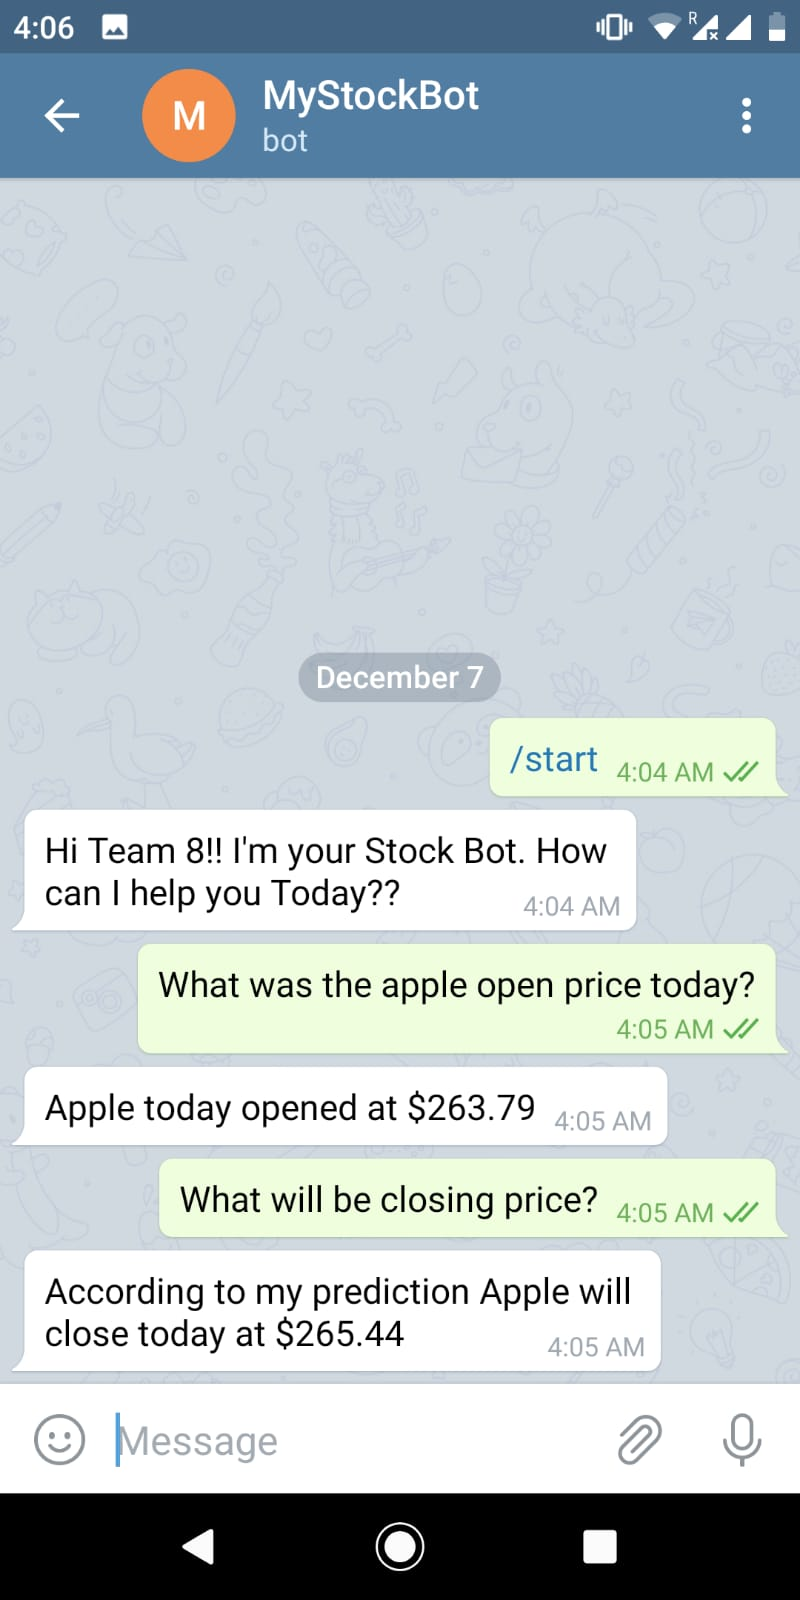

In [305]:
from IPython.display import Image
Image(filename='predict1.jpeg')


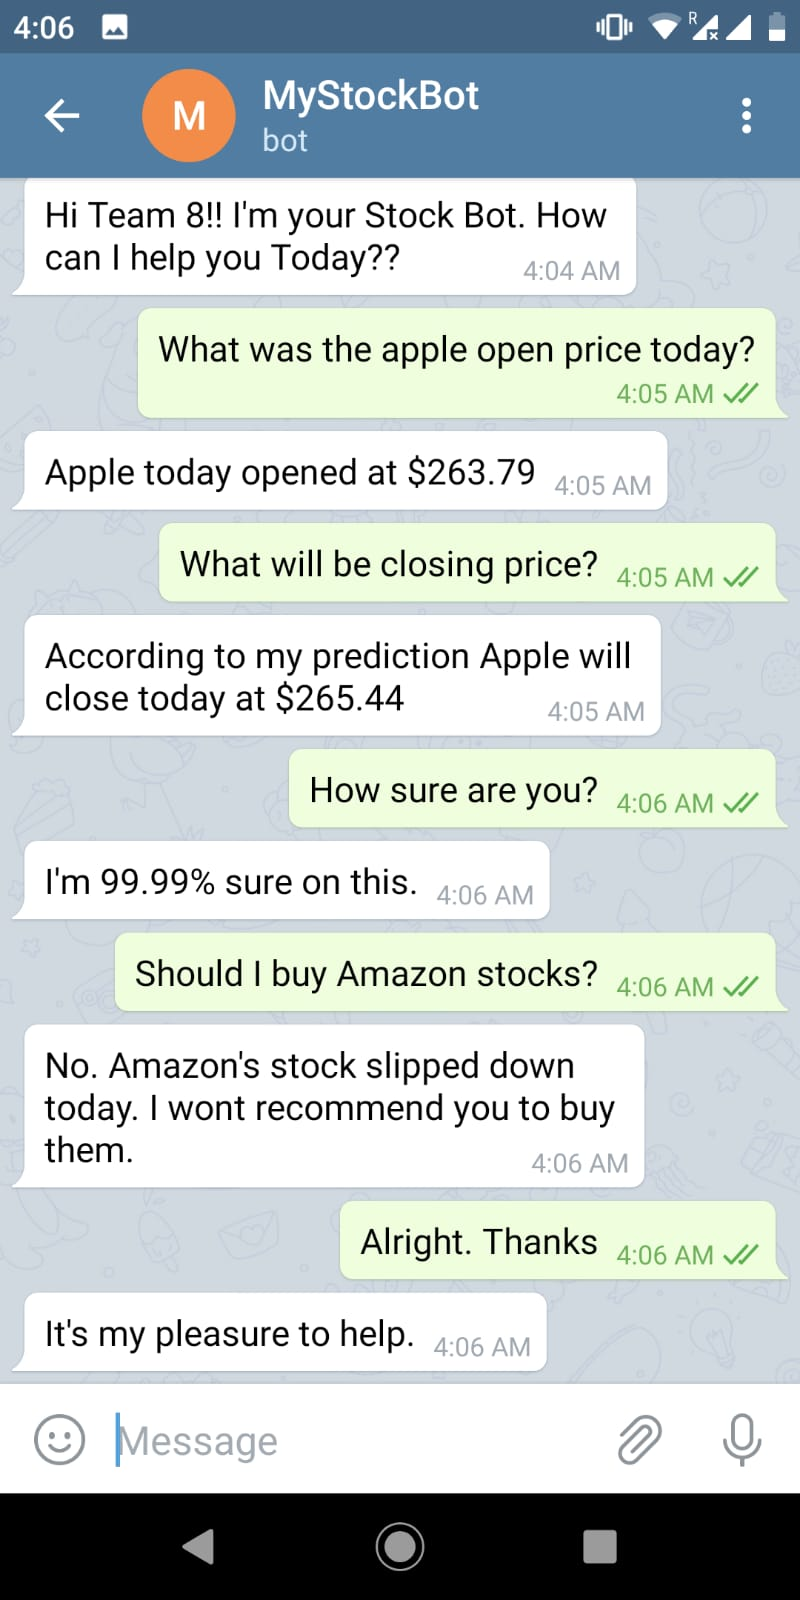

In [306]:
Image(filename='predict 2.jpeg')

### Conclusion

#### In this project, we first explored the trend, level and seasonality of stock prices of Big 5 Tech companies (Apple, Microsoft, Google, Facebook and Amazon) to visually infer how their stocks performed in past 20 years. Then we plotted the candle plots, which are used in high frequency trading, and zoomed in on the area of interest on the graphs to know the reason behind drop or fluctuation in the graph. After that we compared the stocks of the companies with each other to know whose stocks are performing better in the market and what are the better options to invest in right now. After that we did predictions with two Machine Learning Algorithms - Linear Regression and ARIMA. We achieved high accuracy in both the methods (over 99% in linear regression and over 98% in ARIMA). Finally, we integrated our project with StockBot to make it more interactve and user friendly.  